In [1]:
### ValDXer testing
import os
from ValDX.ValidationDX import ValDXer
from ValDX.VDX_Settings import Settings

settings = Settings(name='test_full0.5')
settings.replicates = 2
settings.gamma_range = (2,6)
settings.train_frac = 0.5
settings.RW_exponent = [0]
settings.split_mode = 'r'
settings.HDXer_stride = 10000
settings.RW_do_reweighting = True
settings.RW_do_params = False
import pickle

VDX = ValDXer(settings)
expt_name = 'Experimental'
test_name = "MD_Simulated"


/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX


/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib


Path to 'HDXER_ENV' environment: /Users/alexi/miniconda/envs/HDXER_ENV
Experiment name test_full0.5 already exists. Attempting to change name to test_full0.50
Experiment name test_full0.5 already exists. Attempting to change name to test_full0.51
Experiment name test_full0.5 already exists. Attempting to change name to test_full0.52
Experiment name test_full0.5 already exists. Attempting to change name to test_full0.53
Experiment name test_full0.5 already exists. Attempting to change name to test_full0.54
Experiment name test_full0.5 already exists. Attempting to change name to test_full0.55
Experiment name test_full0.5 already exists. Attempting to change name to test_full0.56
Experiment name test_full0.5 already exists. Attempting to change name to test_full0.57
Experiment name test_full0.5 already exists. Attempting to change name to test_full0.58
Experiment name test_full0.5 already exists. Attempting to change name to test_full0.59
Experiment name test_full0.5 already exists. Atte

In [2]:
print(os.environ["HDXER_PATH"])
print(__name__)

/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/HDXer
__main__


In [3]:
import subprocess
from ValDX.helpful_funcs import conda_to_env_dict

# Assuming settings.HDXer_env contains the name of your Conda environment
env_path = conda_to_env_dict(settings.HDXer_env)

command = "echo $HDXER_PATH"
print("command:", command)

# Run the command in the subprocess
output = subprocess.run(command, shell=True, env=env_path, capture_output=True, text=True)

# Capture and print the standard output (stdout)
hdxer_path = output.stdout.strip()  # .strip() removes any trailing newline
print("HDXER_PATH:", hdxer_path)


Path to 'HDXER_ENV' environment: /Users/alexi/miniconda/envs/HDXER_ENV
command: echo $HDXER_PATH
HDXER_PATH: /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/HDXer


In [4]:
# BPTI data
BPTI_dir = "/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HDXer_tutorial/BPTI"
# BPTI_dir = "/home/alexi/Documents/ValDX/raw_data/HDXer_tutorial/BPTI"


In [5]:
expt_dir = os.path.join(BPTI_dir, "BPTI_expt_data")

os.listdir(expt_dir)

segs_name = "BPTI_residue_segs.txt"
segs_path = os.path.join(expt_dir, segs_name)

hdx_name = "BPTI_expt_dfracs.dat"
hdx_path = os.path.join(expt_dir, hdx_name)
print(hdx_path)

rates_name = "BPTI_Intrinsic_rates.dat"
rates_path = os.path.join(expt_dir, rates_name)


/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HDXer_tutorial/BPTI/BPTI_expt_data/BPTI_expt_dfracs.dat


In [6]:

VDX.load_HDX_data(HDX_path=hdx_path, SEG_path=segs_path, calc_name=expt_name)
# VDX.load_intrinsic_rates(path=rates_path, calc_name=expt_name)


Preparing HDX data for Experimental
Path /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HDXer_tutorial/BPTI/BPTI_expt_data/BPTI_expt_dfracs.dat
AVG: ncol = 6, len(names) = 4


(      0.167      1.0     10.0    120.0  peptide     calc_name
 0   0.15669  0.63957  0.99996  1.00000        0  Experimental
 1   0.09039  0.43293  0.99656  1.00000        1  Experimental
 2   0.02665  0.14933  0.80157  1.00000        2  Experimental
 3   0.18680  0.71010  1.00000  1.00000        3  Experimental
 4   0.99880  1.00000  1.00000  1.00000        4  Experimental
 5   0.82092  0.99997  1.00000  1.00000        5  Experimental
 6   0.23198  0.79413  1.00000  1.00000        6  Experimental
 7   1.00000  1.00000  1.00000  1.00000        7  Experimental
 8   0.00028  0.00165  0.01638  0.17975        8  Experimental
 9   0.91192  1.00000  1.00000  1.00000        9  Experimental
 10  0.00005  0.00030  0.00298  0.03517       10  Experimental
 11  0.00000  0.00000  0.00003  0.00037       11  Experimental
 12  0.00000  0.00000  0.00003  0.00037       12  Experimental
 13  0.00000  0.00000  0.00003  0.00037       13  Experimental
 14  0.00039  0.00232  0.02300  0.24364       14  Exper

In [7]:
print(VDX.HDX_data)

      0.167      1.0     10.0    120.0  peptide     calc_name
0   0.15669  0.63957  0.99996  1.00000        0  Experimental
1   0.09039  0.43293  0.99656  1.00000        1  Experimental
2   0.02665  0.14933  0.80157  1.00000        2  Experimental
3   0.18680  0.71010  1.00000  1.00000        3  Experimental
4   0.99880  1.00000  1.00000  1.00000        4  Experimental
5   0.82092  0.99997  1.00000  1.00000        5  Experimental
6   0.23198  0.79413  1.00000  1.00000        6  Experimental
7   1.00000  1.00000  1.00000  1.00000        7  Experimental
8   0.00028  0.00165  0.01638  0.17975        8  Experimental
9   0.91192  1.00000  1.00000  1.00000        9  Experimental
10  0.00005  0.00030  0.00298  0.03517       10  Experimental
11  0.00000  0.00000  0.00003  0.00037       11  Experimental
12  0.00000  0.00000  0.00003  0.00037       12  Experimental
13  0.00000  0.00000  0.00003  0.00037       13  Experimental
14  0.00039  0.00232  0.02300  0.24364       14  Experimental
15  1.00

In [8]:
print(VDX.paths)


                                                 HDX  \
0  /Users/alexi/Library/CloudStorage/OneDrive-Nex...   

                                                 SEG     calc_name  \
0  /Users/alexi/Library/CloudStorage/OneDrive-Nex...  Experimental   

   experimental  
0         False  


In [9]:
sim_name = 'BPTI_MD'

sim_dir = os.path.join(BPTI_dir, "BPTI_simulations")

os.listdir(sim_dir)

md_reps = 5
rep_dirs = ["Run_"+str(i+1) for i in range(md_reps)]

top_name = "bpti_5pti_eq6_protonly.gro"

top_path = os.path.join(sim_dir, rep_dirs[0], top_name)

traj_name = "bpti_5pti_reimg_protonly.xtc"

traj_paths = [os.path.join(sim_dir, rep_dir, traj_name) for rep_dir in rep_dirs]

print(top_path)
print(traj_paths)




/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HDXer_tutorial/BPTI/BPTI_simulations/Run_1/bpti_5pti_eq6_protonly.gro
['/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HDXer_tutorial/BPTI/BPTI_simulations/Run_1/bpti_5pti_reimg_protonly.xtc', '/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HDXer_tutorial/BPTI/BPTI_simulations/Run_2/bpti_5pti_reimg_protonly.xtc', '/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HDXer_tutorial/BPTI/BPTI_simulations/Run_3/bpti_5pti_reimg_protonly.xtc', '/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HDXer_tutorial/BPTI/BPTI_simulations/Run_4/bpti_5pti_reimg_protonly.xtc', '/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HDXe

In [10]:
print((traj_paths))

['/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HDXer_tutorial/BPTI/BPTI_simulations/Run_1/bpti_5pti_reimg_protonly.xtc', '/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HDXer_tutorial/BPTI/BPTI_simulations/Run_2/bpti_5pti_reimg_protonly.xtc', '/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HDXer_tutorial/BPTI/BPTI_simulations/Run_3/bpti_5pti_reimg_protonly.xtc', '/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HDXer_tutorial/BPTI/BPTI_simulations/Run_4/bpti_5pti_reimg_protonly.xtc', '/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HDXer_tutorial/BPTI/BPTI_simulations/Run_5/bpti_5pti_reimg_protonly.xtc']


In [11]:
VDX.load_structures(top_path=top_path, traj_paths=traj_paths, calc_name=test_name)


                                                 HDX  \
0  /Users/alexi/Library/CloudStorage/OneDrive-Nex...   
1                                                NaN   

                                                 SEG     calc_name  \
0  /Users/alexi/Library/CloudStorage/OneDrive-Nex...  Experimental   
1                                                NaN  MD_Simulated   

  experimental                                                top  \
0        False                                                NaN   
1          NaN  /Users/alexi/Library/CloudStorage/OneDrive-Nex...   

                                                traj  
0                                                NaN  
1  [/Users/alexi/Library/CloudStorage/OneDrive-Ne...  
Structures loaded MD_Simulated: 
MD_Simulated Topology: <Universe with 892 atoms>
MD_Simulated Trajectory: <Universe with 892 atoms>
MD_Simulated Traj: no frames 50005


In [12]:
VDX.settings.RW_do_reweighting

True

In [13]:
# train_dfs, val_dfs, train_gammas, val_gammas = VDX.run_VDX(calc_name=test_name, expt_name=expt_name)

Random seeds: [42, 43]
Randomly splitting segments for MD_Simulated with random seed 42 and train fraction 0.5
train_segs
    ResStr  ResEnd  peptide             calc_name
24      34      35       24  train_MD_Simulated_1
13      22      23       13  train_MD_Simulated_1
8       17      18        8  train_MD_Simulated_1
25      35      36       25  train_MD_Simulated_1
4       11      12        4  train_MD_Simulated_1
Saved train MD_Simulated_1 segments to /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full0.5147/train_MD_Simulated_1/train_residue_segs__MD_Simulated_.txt
Train Peptide numbers: [ 0  4  6  8  9 12 13 15 16 17 19 24 25 26 29 32 34 35 39 40]
Saved val MD_Simulated_1 segments to /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full0.5147/val_MD_Simulated_1/val_residue_segs__MD_Simulated_.txt
Val Peptide numbers: [ 1  2  3  5  7 10 11 14 18 20 21 22 23 27 28 30 3

Path to 'HDXER_ENV' environment: /Users/alexi/miniconda/envs/HDXER_ENV
python /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/HDXer/HDXer/calc_hdx.py -t /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HDXer_tutorial/BPTI/BPTI_simulations/Run_1/bpti_5pti_reimg_protonly.xtc /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HDXer_tutorial/BPTI/BPTI_simulations/Run_2/bpti_5pti_reimg_protonly.xtc /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HDXer_tutorial/BPTI/BPTI_simulations/Run_3/bpti_5pti_reimg_protonly.xtc /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HDXer_tutorial/BPTI/BPTI_simulations/Run_4/bpti_5pti_reimg_protonly.xtc /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_dat

/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dt

Path /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full0.5147/train_MD_Simulated_1/out__train_MD_Simulated_1Segment_average_fractions.dat
AVG: ncol = 6, len(names) = 4
Experimental MD_Simulated True 1
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full0.5147/train_MD_Simulated_1/train_MD_Simulated_1_expt_dfracs.dat
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full0.5147/train_MD_Simulated_1
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full0.5147/train_MD_Simulated_1/out__train_MD_Simulated_1Intrinsic_rates.dat
REWIGHTING train_MD_Simulated_1 with Exponent: 0
[{'do_reweight': True, 'do_params': False, 'stepfactor': 0.001, 'basegamma': 1, 'predictHDX_dir': ['/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/dat

/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib


/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full0.5147/train_MD_Simulated_1/reweighting_gamma_5x10^0
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full0.5147/train_MD_Simulated_1/reweighting_gamma_3x10^0
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full0.5147/train_MD_Simulated_1/reweighting_gamma_2x10^0
Contacts read
Hbonds read
Segments and experimental dfracs read
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full0.5147/train_MD_Simulated_1/reweighting_gamma_4x10^0
Contacts read
Hbonds read
Contacts read
Hbonds read
Segments and experimental dfracs read
Segments and experimental dfracs read
Contacts read
Hbonds read
Segments and experimental dfracs read
         616760 function calls (616683 primitive calls) in 1.125 seconds

   Ordered by: cumulat

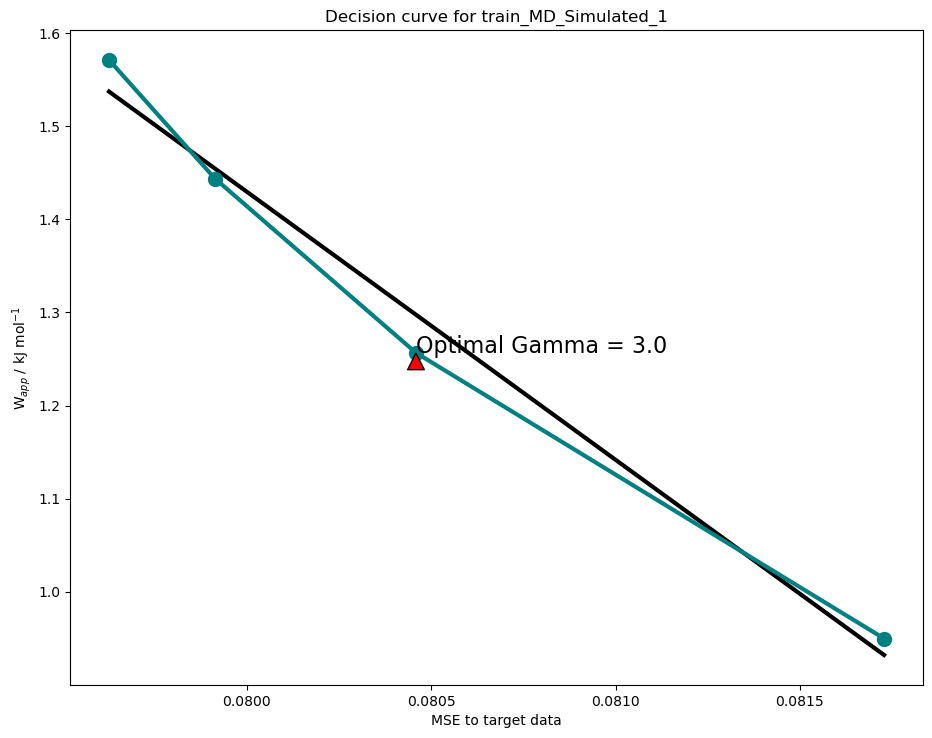

Optimal gamma for train_MD_Simulated_1 is 3.0x10^0
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full0.5147/train_MD_Simulated_1/reweighting_gamma_3x10^0final_segment_fractions.dat
Path /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full0.5147/train_MD_Simulated_1/reweighting_gamma_3x10^0final_segment_fractions.dat
RW: ncol = 4, len(names) = 4
(20, 5)
     0.167      1.0     10.0    120.0  peptide
0  0.00017  0.00104  0.01040  0.11789        0
1  0.00005  0.00031  0.00314  0.03705        1
2  0.01072  0.06251  0.47560  0.99957        2
3  0.00005  0.00027  0.00273  0.03229        3
4  0.94340  1.00000  1.00000  1.00000        4
      0.167      1.0     10.0    120.0  peptide
0   0.00017  0.00104  0.01040  0.11789        0
1   0.00005  0.00031  0.00314  0.03705        1
2   0.01072  0.06251  0.47560  0.99957        2
3   0.00005  0.00027  0.00273  0.03229        3
4   0.9

/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dt

Path /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full0.5147/train_MD_Simulated_2/out__train_MD_Simulated_2Segment_average_fractions.dat
AVG: ncol = 6, len(names) = 4
Experimental MD_Simulated True 2
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full0.5147/train_MD_Simulated_2/train_MD_Simulated_2_expt_dfracs.dat
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full0.5147/train_MD_Simulated_2
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full0.5147/train_MD_Simulated_2/out__train_MD_Simulated_2Intrinsic_rates.dat
REWIGHTING train_MD_Simulated_2 with Exponent: 0
[{'do_reweight': True, 'do_params': False, 'stepfactor': 0.001, 'basegamma': 1, 'predictHDX_dir': ['/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/dat

/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib


/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full0.5147/train_MD_Simulated_2/reweighting_gamma_2x10^0
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full0.5147/train_MD_Simulated_2/reweighting_gamma_5x10^0
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full0.5147/train_MD_Simulated_2/reweighting_gamma_4x10^0
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full0.5147/train_MD_Simulated_2/reweighting_gamma_3x10^0
Contacts read
Hbonds read
Contacts read
Hbonds read
Contacts read
Hbonds read
Contacts read
Hbonds read
Segments and experimental dfracs read
Segments and experimental dfracs read
Segments and experimental dfracs read
Segments and experimental dfracs read
         634424 function calls (634347 primitive calls) in 1.149 seconds

   Ordered by: cumulat

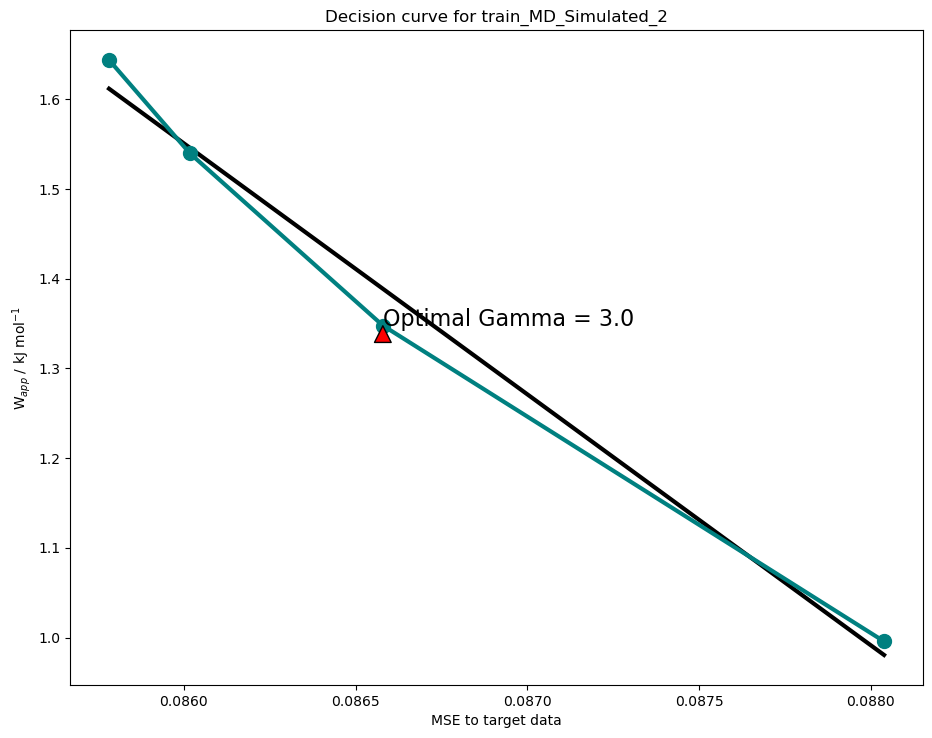

Optimal gamma for train_MD_Simulated_2 is 3.0x10^0
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full0.5147/train_MD_Simulated_2/reweighting_gamma_3x10^0final_segment_fractions.dat
Path /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/test_full0.5147/train_MD_Simulated_2/reweighting_gamma_3x10^0final_segment_fractions.dat
RW: ncol = 4, len(names) = 4
(20, 5)
     0.167      1.0     10.0    120.0  peptide
0  0.00125  0.00747  0.07222  0.59321        0
1  0.82033  0.99997  1.00000  1.00000        1
2  0.00084  0.00503  0.04914  0.45374        2
3  0.01274  0.07392  0.53603  0.99990        3
4  0.77843  0.99988  1.00000  1.00000        4
      0.167      1.0     10.0    120.0  peptide
0   0.00125  0.00747  0.07222  0.59321        0
1   0.82033  0.99997  1.00000  1.00000        1
2   0.00084  0.00503  0.04914  0.45374        2
3   0.01274  0.07392  0.53603  0.99990        3
4   0.7

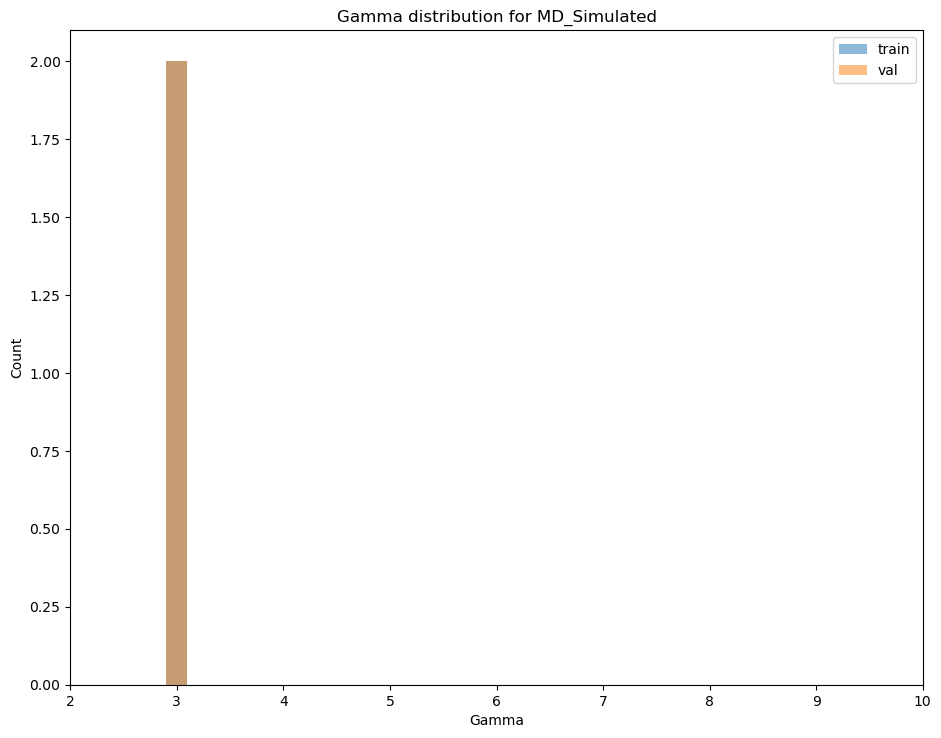

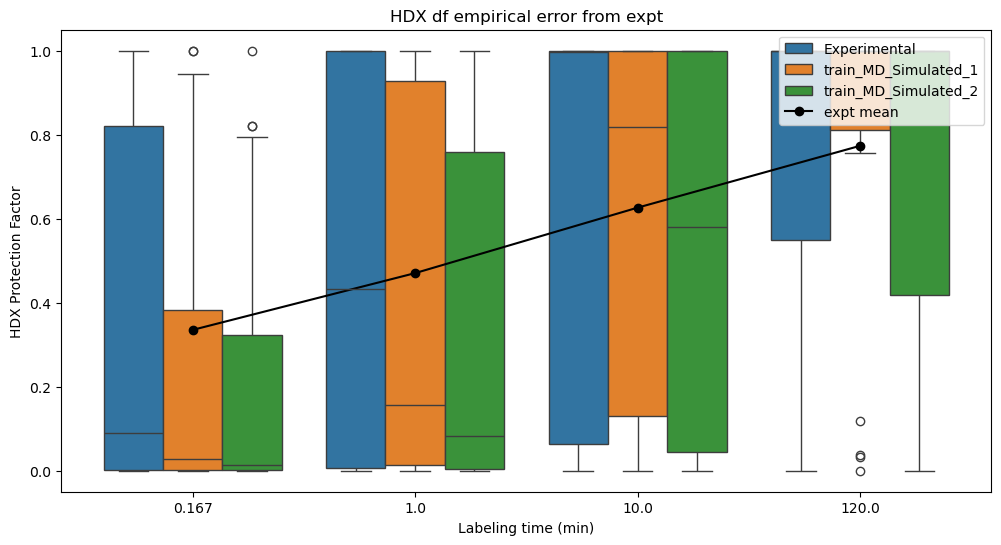

plot_dfracs_compare
        0.167      1.0     10.0  120.0  peptide            calc_name  ResStr  \
0    0.156690  0.63957  0.99996    1.0        0         Experimental     NaN   
1    0.090390  0.43293  0.99656    1.0        1         Experimental     NaN   
2    0.026650  0.14933  0.80157    1.0        2         Experimental     NaN   
3    0.186800  0.71010  1.00000    1.0        3         Experimental     NaN   
4    0.998800  1.00000  1.00000    1.0        4         Experimental     NaN   
..        ...      ...      ...    ...      ...                  ...     ...   
200  0.999450  1.00000  1.00000    1.0       36  test_MD_Simulated_2    51.0   
201  0.999934  1.00000  1.00000    1.0       37  test_MD_Simulated_2    52.0   
202  0.999999  1.00000  1.00000    1.0       38  test_MD_Simulated_2    53.0   
203  1.000000  1.00000  1.00000    1.0       39  test_MD_Simulated_2    54.0   
204  1.000000  1.00000  1.00000    1.0       40  test_MD_Simulated_2    55.0   

     ResEnd path  


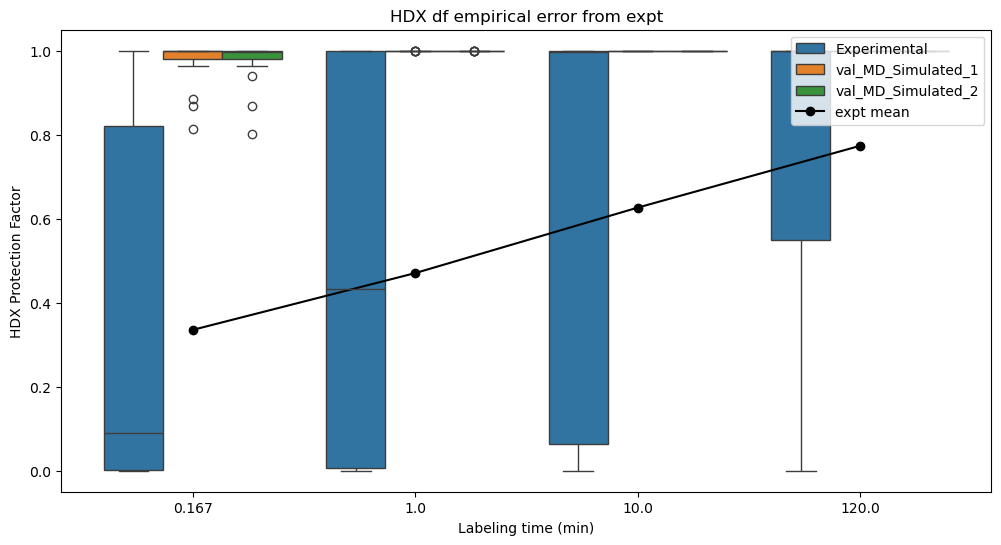

train_rep_names ['train_MD_Simulated_1', 'train_MD_Simulated_2']
val_rep_names ['val_MD_Simulated_1', 'val_MD_Simulated_2']
train_rep_peptides [24, 13, 8, 25, 4, 40, 19, 39, 29, 6, 26, 12, 17, 9, 15, 32, 16, 35, 34, 0]
val_rep_peptides [1, 2, 3, 5, 7, 10, 11, 14, 18, 20, 21, 22, 23, 27, 28, 30, 31, 33, 36, 37, 38]
train_rep_peptides [14, 5, 20, 26, 6, 24, 7, 29, 22, 38, 9, 13, 10, 31, 36, 8, 12, 37, 19, 40]
val_rep_peptides [0, 1, 2, 3, 4, 11, 15, 16, 17, 18, 21, 23, 25, 27, 28, 30, 32, 33, 34, 35, 39]
manual merge df
       0.167      1.0     10.0    120.0  peptide             calc_name  \
0   0.000170  0.00104  0.01040  0.11789       24  train_MD_Simulated_1   
1   0.000050  0.00031  0.00314  0.03705       13  train_MD_Simulated_1   
2   0.010720  0.06251  0.47560  0.99957        8  train_MD_Simulated_1   
3   0.000050  0.00027  0.00273  0.03229       25  train_MD_Simulated_1   
4   0.943400  1.00000  1.00000  1.00000        4  train_MD_Simulated_1   
..       ...      ...      ...  

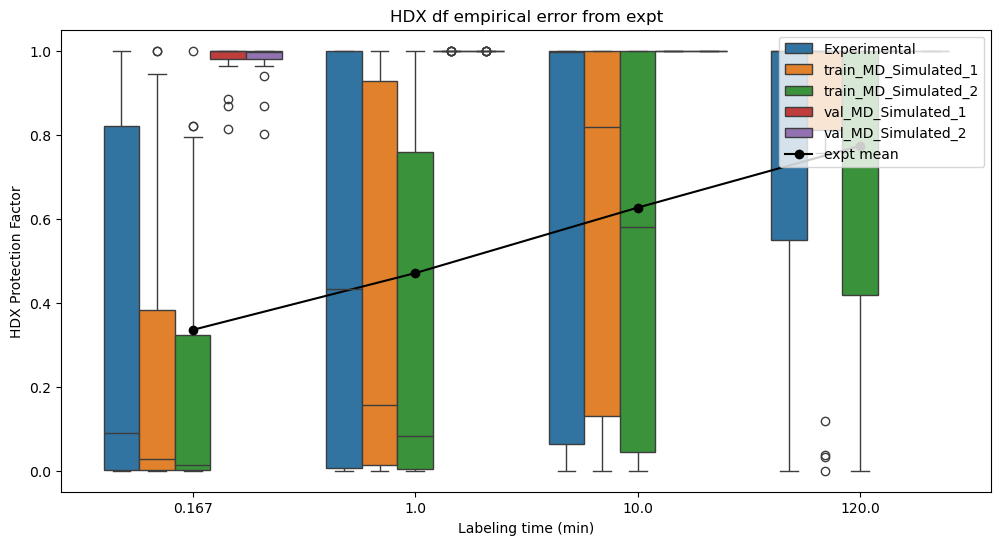

plotting paired errors
        0.167      1.0     10.0  120.0  peptide           calc_name  ResStr  \
0    0.156690  0.63957  0.99996    1.0        0        Experimental     NaN   
1    0.090390  0.43293  0.99656    1.0        1        Experimental     NaN   
2    0.026650  0.14933  0.80157    1.0        2        Experimental     NaN   
3    0.186800  0.71010  1.00000    1.0        3        Experimental     NaN   
4    0.998800  1.00000  1.00000    1.0        4        Experimental     NaN   
..        ...      ...      ...    ...      ...                 ...     ...   
118  0.988997  1.00000  1.00000    1.0       32  val_MD_Simulated_2    44.0   
119  0.997799  1.00000  1.00000    1.0       33  val_MD_Simulated_2    46.0   
120  0.999999  1.00000  1.00000    1.0       34  val_MD_Simulated_2    47.0   
121  0.995983  1.00000  1.00000    1.0       35  val_MD_Simulated_2    50.0   
122  1.000000  1.00000  1.00000    1.0       39  val_MD_Simulated_2    54.0   

     ResEnd                 

/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


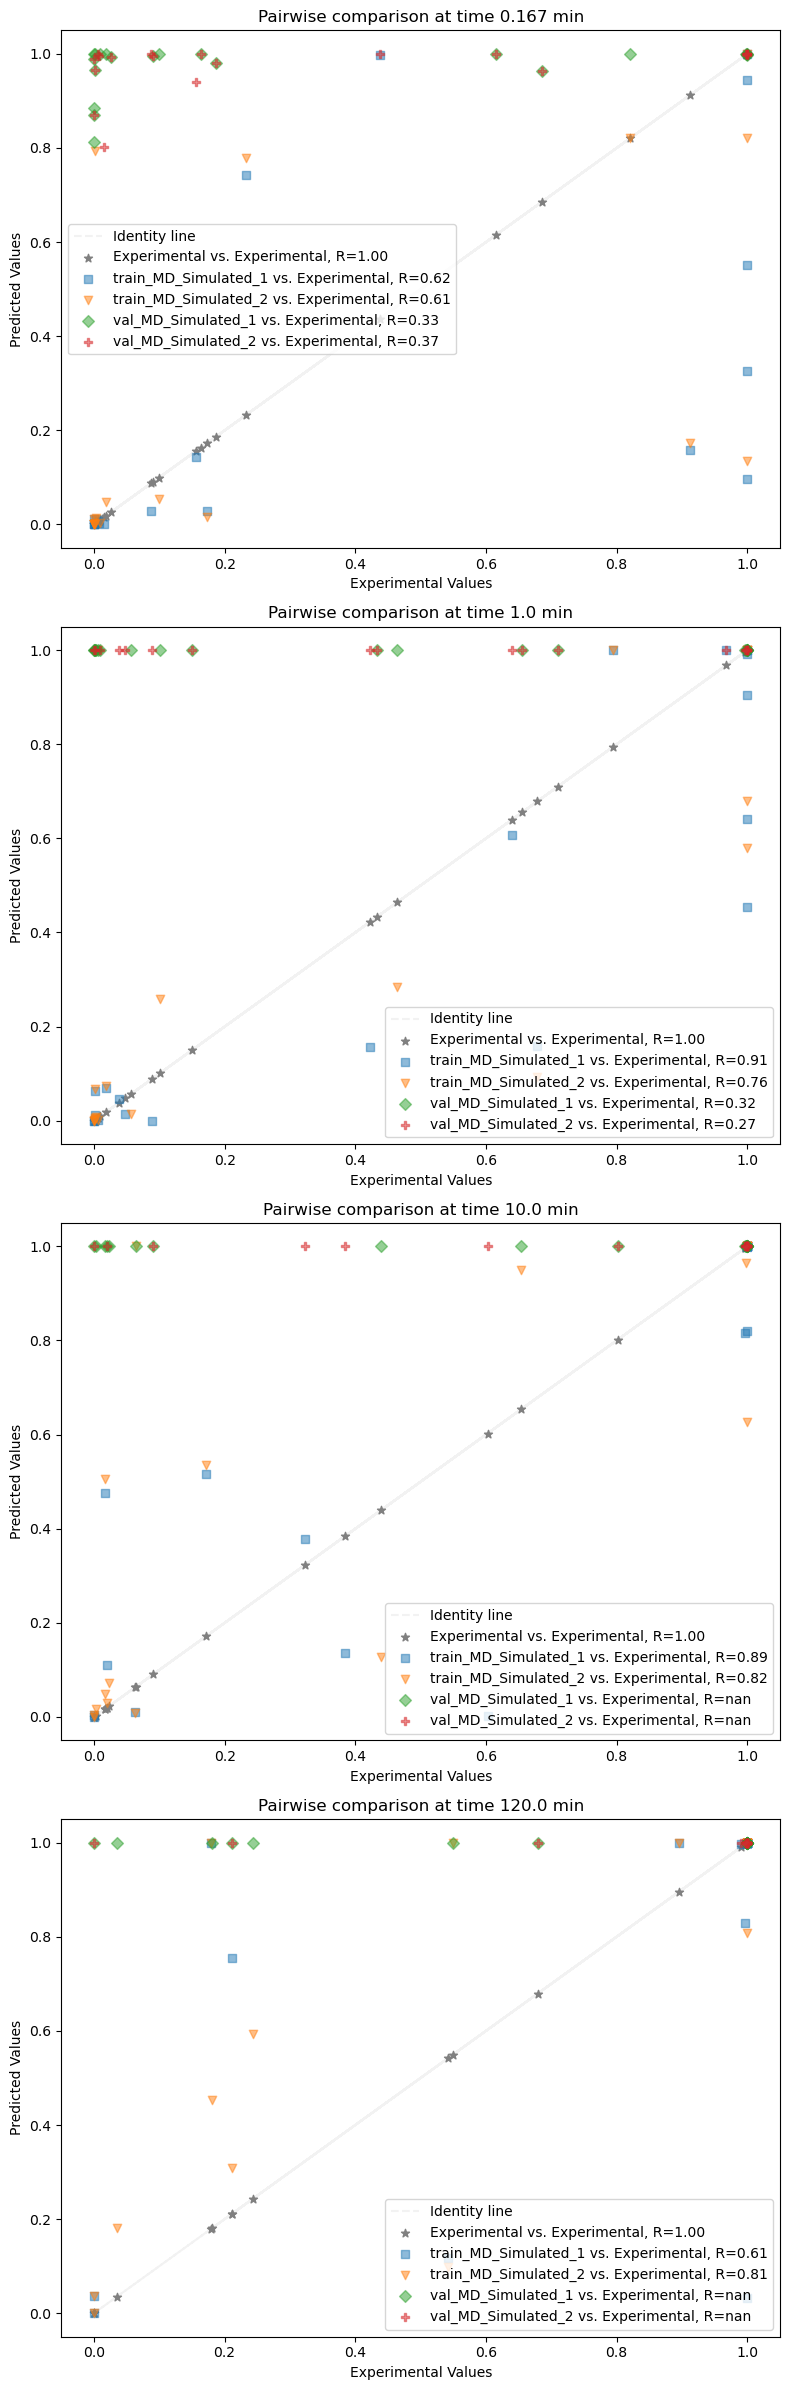

plotting paired trainval agreement
        0.167      1.0     10.0  120.0  peptide           calc_name  ResStr  \
0    0.156690  0.63957  0.99996    1.0        0        Experimental     NaN   
1    0.090390  0.43293  0.99656    1.0        1        Experimental     NaN   
2    0.026650  0.14933  0.80157    1.0        2        Experimental     NaN   
3    0.186800  0.71010  1.00000    1.0        3        Experimental     NaN   
4    0.998800  1.00000  1.00000    1.0        4        Experimental     NaN   
..        ...      ...      ...    ...      ...                 ...     ...   
118  0.988997  1.00000  1.00000    1.0       32  val_MD_Simulated_2    44.0   
119  0.997799  1.00000  1.00000    1.0       33  val_MD_Simulated_2    46.0   
120  0.999999  1.00000  1.00000    1.0       34  val_MD_Simulated_2    47.0   
121  0.995983  1.00000  1.00000    1.0       35  val_MD_Simulated_2    50.0   
122  1.000000  1.00000  1.00000    1.0       39  val_MD_Simulated_2    54.0   

     ResEnd     

/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/ValDX/HDX_plots.py:1340: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([[t, R, arg]], columns=["Time", "R", "calc_name"])])
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/ValDX/HDX_plots.py:1359: FutureWarning: The behavior 

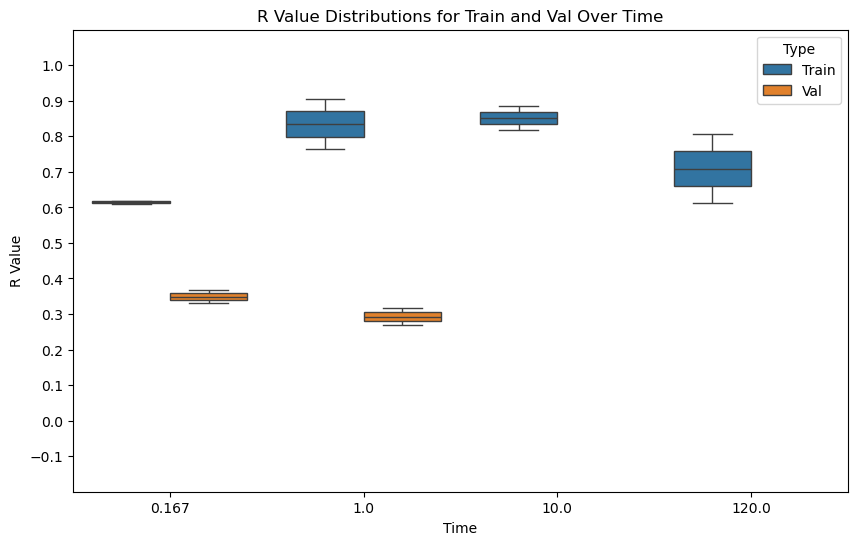

nan_df
        0.167      1.0     10.0    120.0  peptide             calc_name  \
0    0.000170  0.00104  0.01040  0.11789       24  train_MD_Simulated_1   
1    0.000050  0.00031  0.00314  0.03705       13  train_MD_Simulated_1   
2    0.010720  0.06251  0.47560  0.99957        8  train_MD_Simulated_1   
3    0.000050  0.00027  0.00273  0.03229       25  train_MD_Simulated_1   
4    0.943400  1.00000  1.00000  1.00000        4  train_MD_Simulated_1   
..        ...      ...      ...      ...      ...                   ...   
159  0.988997  1.00000  1.00000  1.00000       32    val_MD_Simulated_2   
160  0.997799  1.00000  1.00000  1.00000       33    val_MD_Simulated_2   
161  0.999999  1.00000  1.00000  1.00000       34    val_MD_Simulated_2   
162  0.995983  1.00000  1.00000  1.00000       35    val_MD_Simulated_2   
163  1.000000  1.00000  1.00000  1.00000       39    val_MD_Simulated_2   

     ResStr  ResEnd                                               path  
0       NaN     NaN

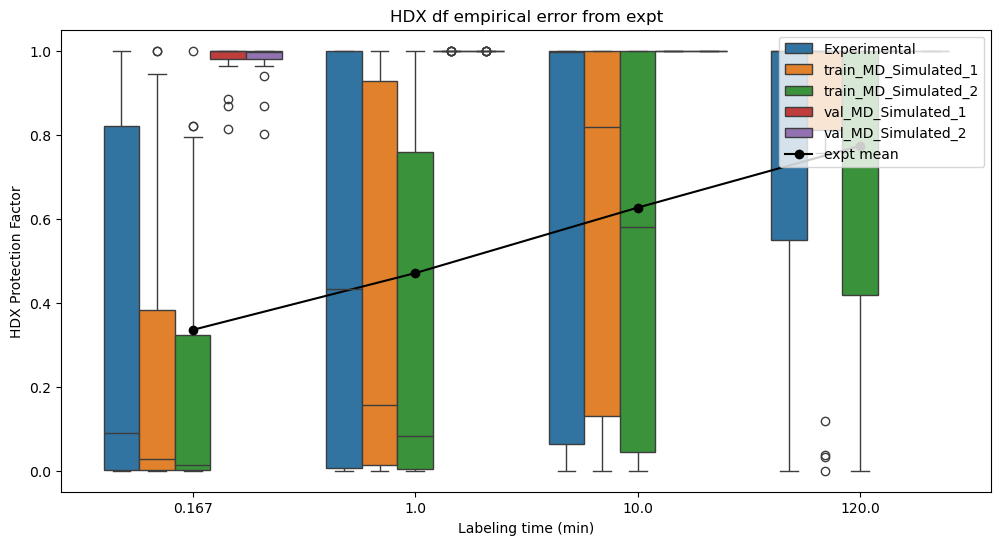

plot_dfracs_compare_abs
       0.167      1.0     10.0    120.0  peptide             calc_name  \
0    0.00017  0.00104  0.01040  0.11789       24  train_MD_Simulated_1   
1    0.00005  0.00031  0.00314  0.03705       13  train_MD_Simulated_1   
2    0.01072  0.06251  0.47560  0.99957        8  train_MD_Simulated_1   
3    0.00005  0.00027  0.00273  0.03229       25  train_MD_Simulated_1   
4    0.94340  1.00000  1.00000  1.00000        4  train_MD_Simulated_1   
..       ...      ...      ...      ...      ...                   ...   
200  0.00963  0.05627  0.43963  0.99904       36          Experimental   
201  0.01757  0.10068  0.65396  1.00000       37          Experimental   
202  0.09888  0.46390  0.99804  1.00000       38          Experimental   
203  0.00650  0.03831  0.32339  0.99079       39          Experimental   
204  0.17259  0.67841  0.99999  1.00000       40          Experimental   

     ResStr  ResEnd path  
0       NaN     NaN  NaN  
1       NaN     NaN  NaN  
2     

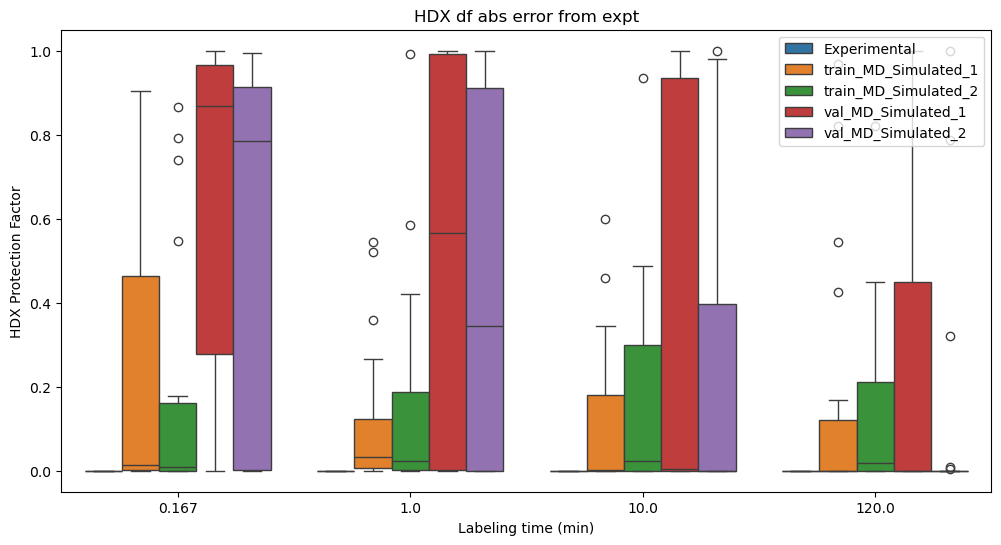

plot_dfracs_compare_MSE
       0.167      1.0     10.0    120.0  peptide             calc_name  \
0    0.00017  0.00104  0.01040  0.11789       24  train_MD_Simulated_1   
1    0.00005  0.00031  0.00314  0.03705       13  train_MD_Simulated_1   
2    0.01072  0.06251  0.47560  0.99957        8  train_MD_Simulated_1   
3    0.00005  0.00027  0.00273  0.03229       25  train_MD_Simulated_1   
4    0.94340  1.00000  1.00000  1.00000        4  train_MD_Simulated_1   
..       ...      ...      ...      ...      ...                   ...   
200  0.00963  0.05627  0.43963  0.99904       36          Experimental   
201  0.01757  0.10068  0.65396  1.00000       37          Experimental   
202  0.09888  0.46390  0.99804  1.00000       38          Experimental   
203  0.00650  0.03831  0.32339  0.99079       39          Experimental   
204  0.17259  0.67841  0.99999  1.00000       40          Experimental   

     ResStr  ResEnd path  
0       NaN     NaN  NaN  
1       NaN     NaN  NaN  
2     

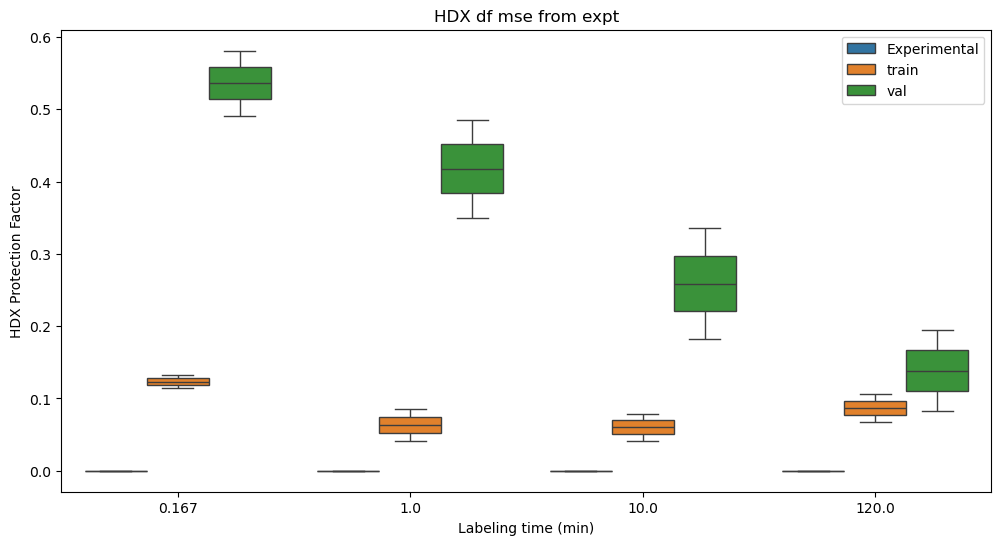

plotting paired errors
       0.167      1.0     10.0    120.0  peptide             calc_name  \
0    0.00017  0.00104  0.01040  0.11789       24  train_MD_Simulated_1   
1    0.00005  0.00031  0.00314  0.03705       13  train_MD_Simulated_1   
2    0.01072  0.06251  0.47560  0.99957        8  train_MD_Simulated_1   
3    0.00005  0.00027  0.00273  0.03229       25  train_MD_Simulated_1   
4    0.94340  1.00000  1.00000  1.00000        4  train_MD_Simulated_1   
..       ...      ...      ...      ...      ...                   ...   
200  0.00963  0.05627  0.43963  0.99904       36          Experimental   
201  0.01757  0.10068  0.65396  1.00000       37          Experimental   
202  0.09888  0.46390  0.99804  1.00000       38          Experimental   
203  0.00650  0.03831  0.32339  0.99079       39          Experimental   
204  0.17259  0.67841  0.99999  1.00000       40          Experimental   

     ResStr  ResEnd path  
0       NaN     NaN  NaN  
1       NaN     NaN  NaN  
2      

/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


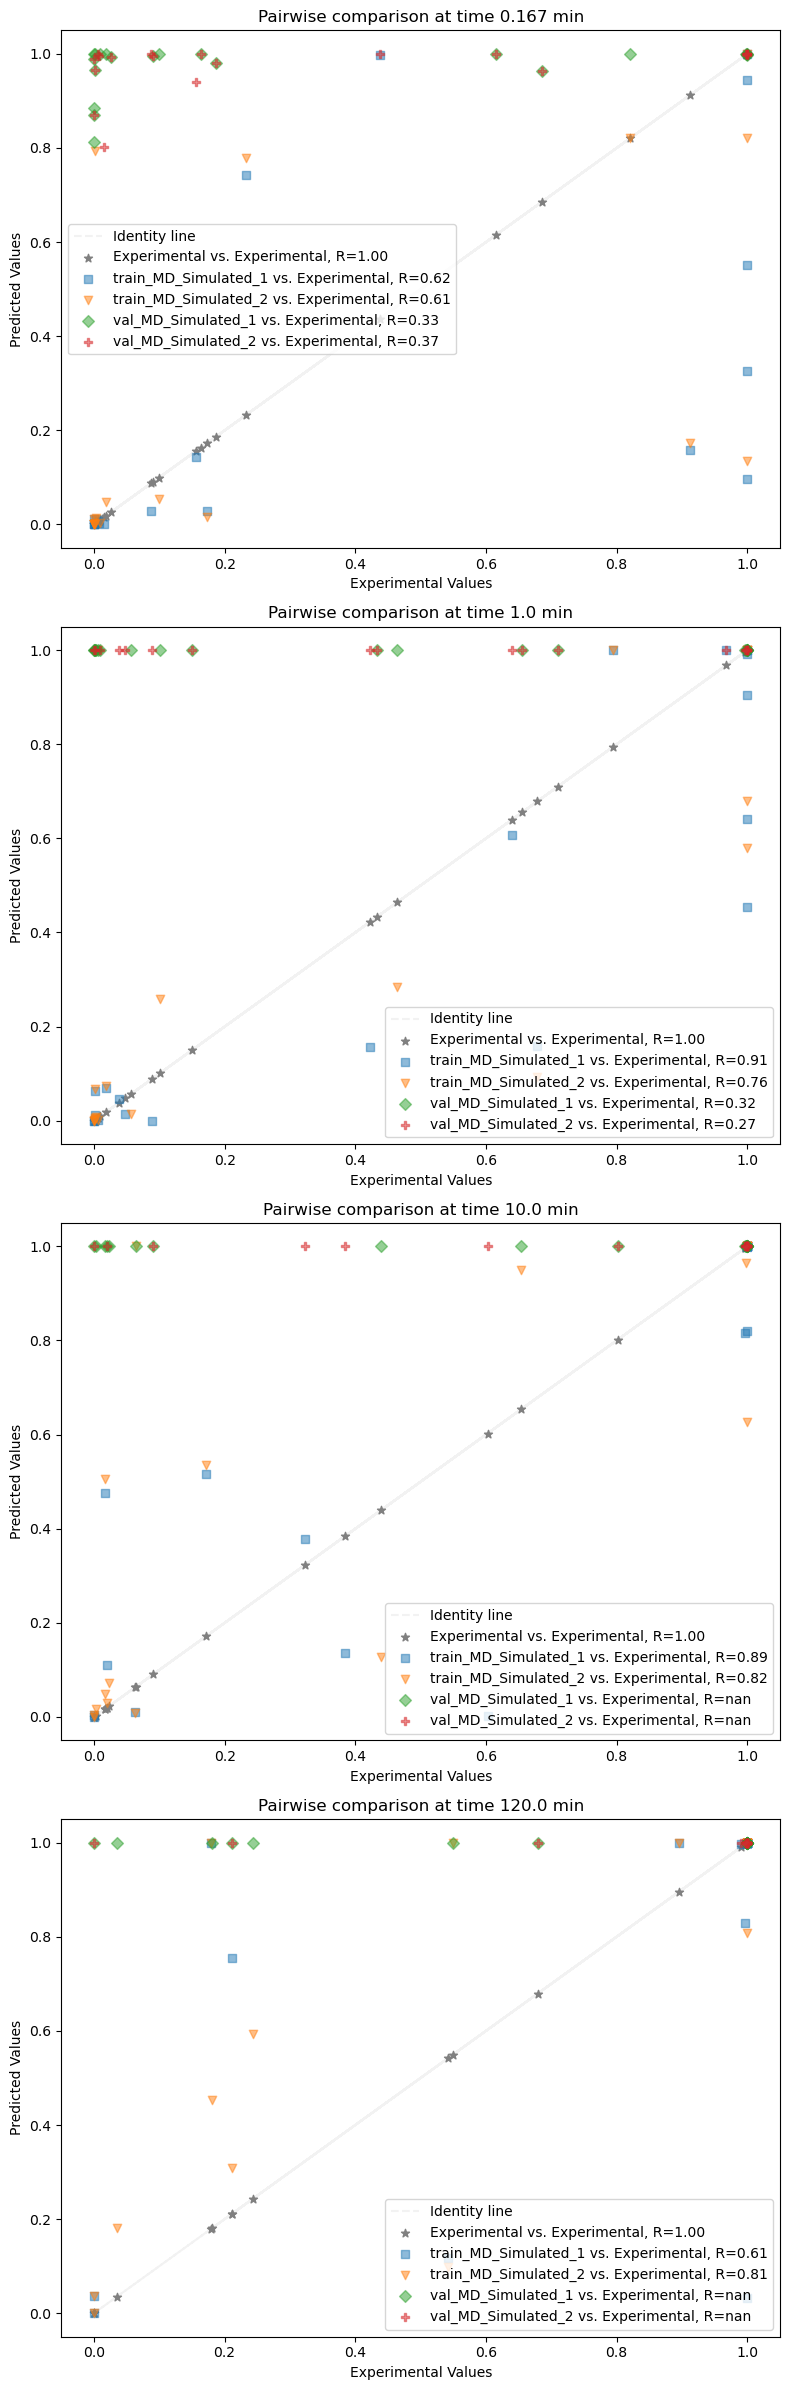

In [14]:
train_dfs, val_dfs, train_gammas, val_gammas = VDX.run_VDX(calc_name=test_name, expt_name=expt_name)

In [15]:
print(VDX.HDX_data)

        0.167      1.0     10.0  120.0  peptide            calc_name  ResStr  \
0    0.156690  0.63957  0.99996    1.0        0         Experimental     NaN   
1    0.090390  0.43293  0.99656    1.0        1         Experimental     NaN   
2    0.026650  0.14933  0.80157    1.0        2         Experimental     NaN   
3    0.186800  0.71010  1.00000    1.0        3         Experimental     NaN   
4    0.998800  1.00000  1.00000    1.0        4         Experimental     NaN   
..        ...      ...      ...    ...      ...                  ...     ...   
200  0.999450  1.00000  1.00000    1.0       36  test_MD_Simulated_2    51.0   
201  0.999934  1.00000  1.00000    1.0       37  test_MD_Simulated_2    52.0   
202  0.999999  1.00000  1.00000    1.0       38  test_MD_Simulated_2    53.0   
203  1.000000  1.00000  1.00000    1.0       39  test_MD_Simulated_2    54.0   
204  1.000000  1.00000  1.00000    1.0       40  test_MD_Simulated_2    55.0   

     ResEnd path  
0       NaN  NaN  
1

In [16]:
test_list = [i for i in range(1, 2)]
print(test_list)

[1]


In [17]:
VDX.HDX_data    

,0.167,1.0,10.0,120.0,peptide,calc_name,ResStr,ResEnd,path
0,0.156690,0.63957,0.99996,1.0,0,Experimental,NaN,NaN,NaN
1,0.090390,0.43293,0.99656,1.0,1,Experimental,NaN,NaN,NaN
2,0.026650,0.14933,0.80157,1.0,2,Experimental,NaN,NaN,NaN
3,0.186800,0.71010,1.00000,1.0,3,Experimental,NaN,NaN,NaN
4,0.998800,1.00000,1.00000,1.0,4,Experimental,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
200,0.999450,1.00000,1.00000,1.0,36,test_MD_Simulated_2,51.0,52.0,NaN
201,0.999934,1.00000,1.00000,1.0,37,test_MD_Simulated_2,52.0,53.0,NaN
202,0.999999,1.00000,1.00000,1.0,38,test_MD_Simulated_2,53.0,54.0,NaN
203,1.000000,1.00000,1.00000,1.0,39,test_MD_Simulated_2,54.0,55.0,NaN


In [18]:
rep_name ="train_MD_Simulated_1"
rates = VDX.rates[VDX.rates["calc_name"] == rep_name]["rates"][0]

print(rates)

{3: 917.89750993, 4: 481.71945087, 5: 5161.71683323, 6: 961.15665221, 7: 606.44884922, 10: 391.55626544, 11: 1210.02453405, 12: 1874.10610826, 14: 2586.98658096, 15: 3332.68430264, 16: 1670.29882931, 17: 1523.33063592, 18: 391.55626418, 19: 138.92940524, 20: 897.00357941, 21: 1129.26060126, 22: 818.07698781, 23: 781.2574583, 24: 4393.33353955, 25: 2647.24524348, 26: 1155.56446029, 27: 1670.29882931, 28: 1182.48101644, 29: 492.94013356, 30: 2772.00606395, 31: 4195.60095807, 32: 1709.20508419, 33: 1155.56445915, 34: 290.26466884, 35: 492.94013192, 36: 1326.76551956, 37: 1749.01759097, 38: 6649.57939778, 39: 4393.33353926, 40: 2102.78164041, 41: 1155.56446029, 42: 2008.14087449, 43: 6498.2164901, 44: 8180.76987097, 45: 1523.3306357, 46: 1326.76551855, 47: 3915.56263922, 48: 2528.09957894, 49: 983.54486703, 50: 1129.26070603, 51: 2970.25801533, 52: 3571.03556843, 53: 1962.43000752, 54: 1789.75743804, 55: 7125.15269472, 56: 3410.31249293, 57: 1749.01759097, 58: 29.70267902}


In [19]:
expt_name

'Experimental'

In [20]:

segs = VDX.segs[VDX.segs["calc_name"] == expt_name].copy()

# df = segs.drop(columns=["calc_name"]).copy()


In [21]:
import numpy as np
segs["Residues"]= segs.apply(lambda x: np.array(range(x["ResStr"], x["ResEnd"]+1)), axis=1)
residues = segs["Residues"].to_numpy()
residues = np.concatenate(residues)
residues = np.unique(residues)
print(residues)

[ 4  5  6  7  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28
 29 30 31 32 33 34 35 36 37 38 40 41 42 43 44 45 46 47 48 50 51 52 53 54
 55 56]


In [22]:
segs["Residues"]= segs.apply(lambda x: list(range(x["ResStr"], x["ResEnd"]+1)), axis=1)


In [23]:
VDX.HDX_data[VDX.HDX_data["calc_name"] == "val_MD_Simulated_2"]

,0.167,1.0,10.0,120.0,peptide,calc_name,ResStr,ResEnd,path
143,0.939530,0.999998,1.0,1.0,0,val_MD_Simulated_2,4.0,5.0,/Users/alexi/Library/CloudStorage/OneDrive-Nex...
144,0.996067,1.000000,1.0,1.0,1,val_MD_Simulated_2,5.0,6.0,/Users/alexi/Library/CloudStorage/OneDrive-Nex...
145,0.993720,1.000000,1.0,1.0,2,val_MD_Simulated_2,6.0,7.0,/Users/alexi/Library/CloudStorage/OneDrive-Nex...
146,0.981267,1.000000,1.0,1.0,3,val_MD_Simulated_2,9.0,10.0,/Users/alexi/Library/CloudStorage/OneDrive-Nex...
147,0.999998,1.000000,1.0,1.0,4,val_MD_Simulated_2,11.0,12.0,/Users/alexi/Library/CloudStorage/OneDrive-Nex...
148,0.869240,0.999992,1.0,1.0,11,val_MD_Simulated_2,20.0,21.0,/Users/alexi/Library/CloudStorage/OneDrive-Nex...
149,0.999066,1.000000,1.0,1.0,15,val_MD_Simulated_2,24.0,25.0,/Users/alexi/Library/CloudStorage/OneDrive-Nex...
150,1.000000,1.000000,1.0,1.0,16,val_MD_Simulated_2,26.0,27.0,/Users/alexi/Library/CloudStorage/OneDrive-Nex...
151,0.999985,1.000000,1.0,1.0,17,val_MD_Simulated_2,27.0,28.0,/Users/alexi/Library/CloudStorage/OneDrive-Nex...
152,0.965257,1.000000,1.0,1.0,18,val_MD_Simulated_2,28.0,29.0,/Users/alexi/Library/CloudStorage/OneDrive-Nex...


In [24]:
VDX.HDX_data[VDX.HDX_data["calc_name"] == "train_MD_Simulated_2"]

,0.167,1.0,10.0,120.0,peptide,calc_name,ResStr,ResEnd,path
123,0.00125,0.00747,0.07222,0.59321,0,train_MD_Simulated_2,NaN,NaN,NaN
124,0.82033,0.99997,1.00000,1.00000,1,train_MD_Simulated_2,NaN,NaN,NaN
125,0.00084,0.00503,0.04914,0.45374,2,train_MD_Simulated_2,NaN,NaN,NaN
126,0.01274,0.07392,0.53603,0.99990,3,train_MD_Simulated_2,NaN,NaN,NaN
127,0.77843,0.99988,1.00000,1.00000,4,train_MD_Simulated_2,NaN,NaN,NaN
128,0.00015,0.00087,0.00867,0.09919,5,train_MD_Simulated_2,NaN,NaN,NaN
129,0.82137,0.99997,1.00000,1.00000,6,train_MD_Simulated_2,NaN,NaN,NaN
130,1.00000,1.00000,1.00000,1.00000,7,train_MD_Simulated_2,NaN,NaN,NaN
131,0.00052,0.00308,0.03040,0.30959,8,train_MD_Simulated_2,NaN,NaN,NaN
132,0.05420,0.28370,0.96444,1.00000,9,train_MD_Simulated_2,NaN,NaN,NaN


In [25]:
# VDX.save_experiment()

# dump = train_dfs, val_dfs, train_gammas, val_gammas

# import pickle
# with open(f'dump_{VDX.name}.pickle', 'wb') as f:
#     print(f"Saving pickle", f'dump_{VDX.name}.pickle')
    # pickle.dump(dump, f)

In [26]:
break
# 

SyntaxError: 'break' outside loop (285273340.py, line 1)

In [ ]:

# VDX = ValDXer(settings=settings)
# VDX = VDX.load_experiment(load_path='logs/test_full0.560_1706363166.pkl')

Path to 'HDXER_ENV' environment: /Users/alexi/miniconda/envs/HDXER_ENV
Experiment name test_full0.5 already exists. Attempting to change name to test_full0.50
Experiment name test_full0.5 already exists. Attempting to change name to test_full0.51
Experiment name test_full0.5 already exists. Attempting to change name to test_full0.52
Experiment name test_full0.5 already exists. Attempting to change name to test_full0.53
Experiment name test_full0.5 already exists. Attempting to change name to test_full0.54
Experiment name test_full0.5 already exists. Attempting to change name to test_full0.55
Experiment name test_full0.5 already exists. Attempting to change name to test_full0.56
Experiment name test_full0.5 already exists. Attempting to change name to test_full0.57
Experiment name test_full0.5 already exists. Attempting to change name to test_full0.58
Experiment name test_full0.5 already exists. Attempting to change name to test_full0.59
Experiment name test_full0.5 already exists. Atte

['train_MD_Simulated_1', 'train_MD_Simulated_2']
['val_MD_Simulated_1', 'val_MD_Simulated_2']
plot_dfracs_compare
       0.167      1.0     10.0    120.0  peptide           calc_name
0    0.15669  0.63957  0.99996  1.00000        0        Experimental
1    0.09039  0.43293  0.99656  1.00000        1        Experimental
2    0.02665  0.14933  0.80157  1.00000        2        Experimental
3    0.18680  0.71010  1.00000  1.00000        3        Experimental
4    0.99880  1.00000  1.00000  1.00000        4        Experimental
..       ...      ...      ...      ...      ...                 ...
118  0.17627  0.68688  0.99999  1.00000       16  val_MD_Simulated_2
119  0.19355  0.72421  1.00000  1.00000       17  val_MD_Simulated_2
120  0.00799  0.04692  0.38156  0.99687       18  val_MD_Simulated_2
121  0.00365  0.02165  0.19662  0.92771       19  val_MD_Simulated_2
122  0.00943  0.05515  0.43293  0.99889       20  val_MD_Simulated_2

[123 rows x 6 columns]
      0.167      1.0     10.0    1

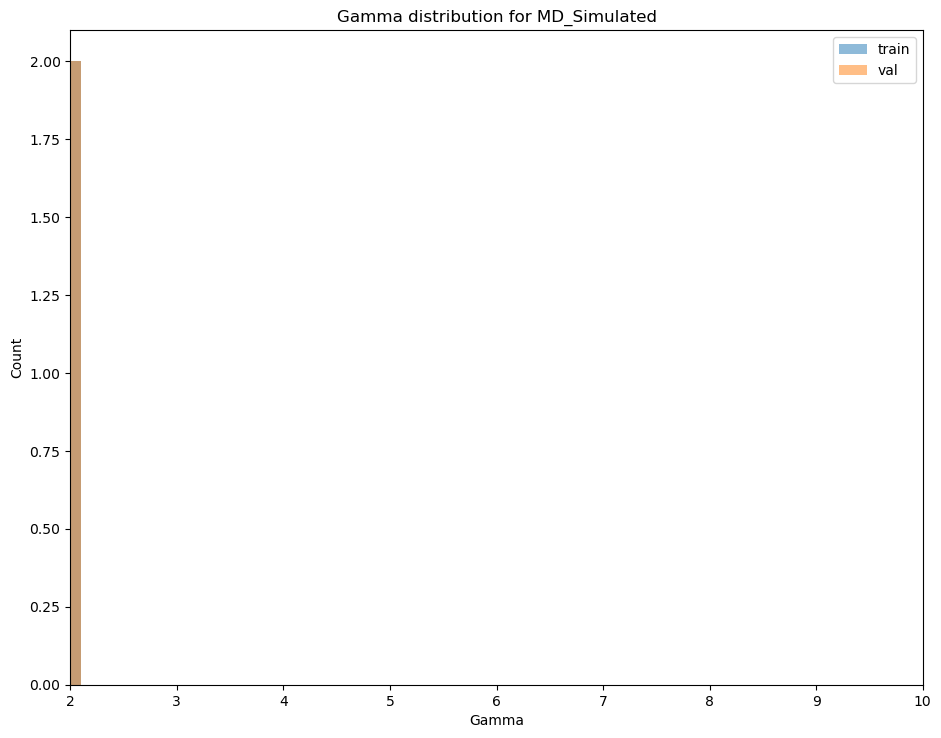

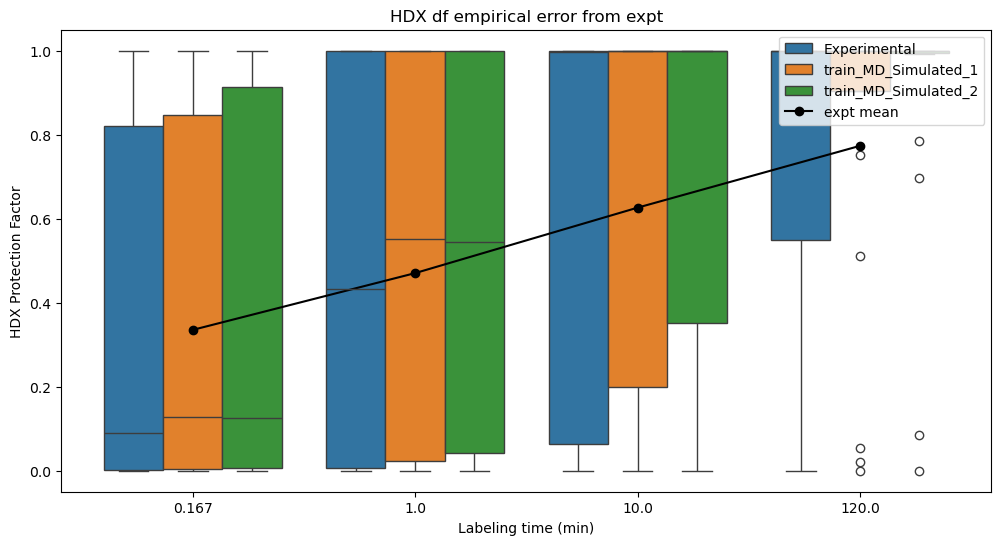

plot_dfracs_compare
       0.167      1.0     10.0    120.0  peptide           calc_name
0    0.15669  0.63957  0.99996  1.00000        0        Experimental
1    0.09039  0.43293  0.99656  1.00000        1        Experimental
2    0.02665  0.14933  0.80157  1.00000        2        Experimental
3    0.18680  0.71010  1.00000  1.00000        3        Experimental
4    0.99880  1.00000  1.00000  1.00000        4        Experimental
..       ...      ...      ...      ...      ...                 ...
118  0.17627  0.68688  0.99999  1.00000       16  val_MD_Simulated_2
119  0.19355  0.72421  1.00000  1.00000       17  val_MD_Simulated_2
120  0.00799  0.04692  0.38156  0.99687       18  val_MD_Simulated_2
121  0.00365  0.02165  0.19662  0.92771       19  val_MD_Simulated_2
122  0.00943  0.05515  0.43293  0.99889       20  val_MD_Simulated_2

[123 rows x 6 columns]
      0.167      1.0     10.0    120.0  peptide     calc_name
0   0.15669  0.63957  0.99996  1.00000        0  Experimental
1   

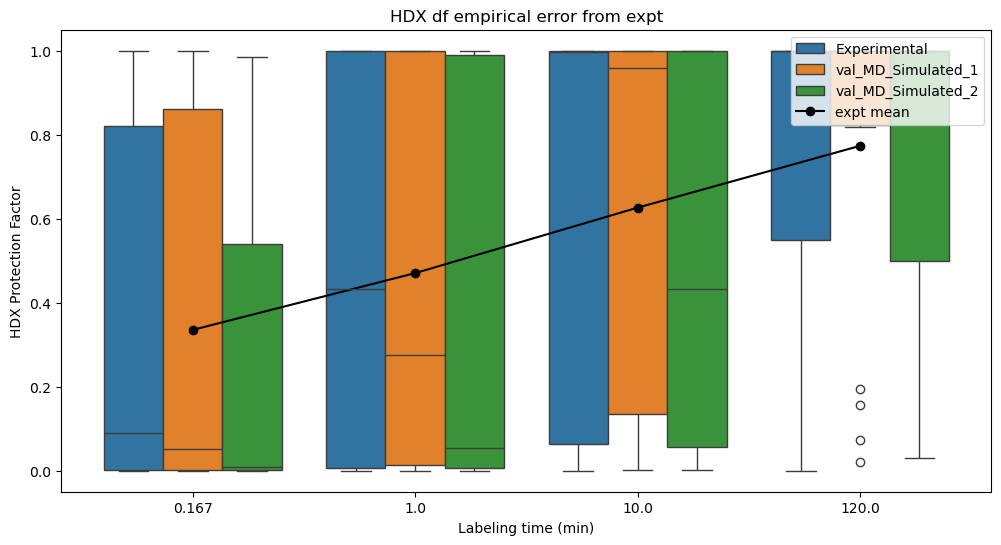

train_rep_names ['train_MD_Simulated_1', 'train_MD_Simulated_2']
val_rep_names ['val_MD_Simulated_1', 'val_MD_Simulated_2']
train_rep_peptides [1, 3, 4, 7, 9, 11, 12, 15, 16, 20, 25, 26, 27, 30, 31, 32, 34, 35, 38, 39]
val_rep_peptides [0, 2, 5, 6, 8, 10, 13, 14, 17, 18, 19, 21, 22, 23, 24, 28, 29, 33, 36, 37, 40]
train_rep_peptides [0, 2, 5, 7, 8, 12, 13, 15, 17, 18, 28, 29, 30, 31, 32, 33, 34, 37, 38, 40]
val_rep_peptides [1, 3, 4, 6, 9, 10, 11, 14, 16, 19, 20, 21, 22, 23, 24, 25, 26, 27, 35, 36, 39]
manual merge df
      0.167      1.0     10.0    120.0  peptide             calc_name
0   0.00432  0.02559  0.22834  0.95543        1  train_MD_Simulated_1
1   0.51718  0.98722  1.00000  1.00000        3  train_MD_Simulated_1
2   0.95159  1.00000  1.00000  1.00000        4  train_MD_Simulated_1
3   0.99306  1.00000  1.00000  1.00000        7  train_MD_Simulated_1
4   0.45141  0.97255  1.00000  1.00000        9  train_MD_Simulated_1
..      ...      ...      ...      ...      ...         

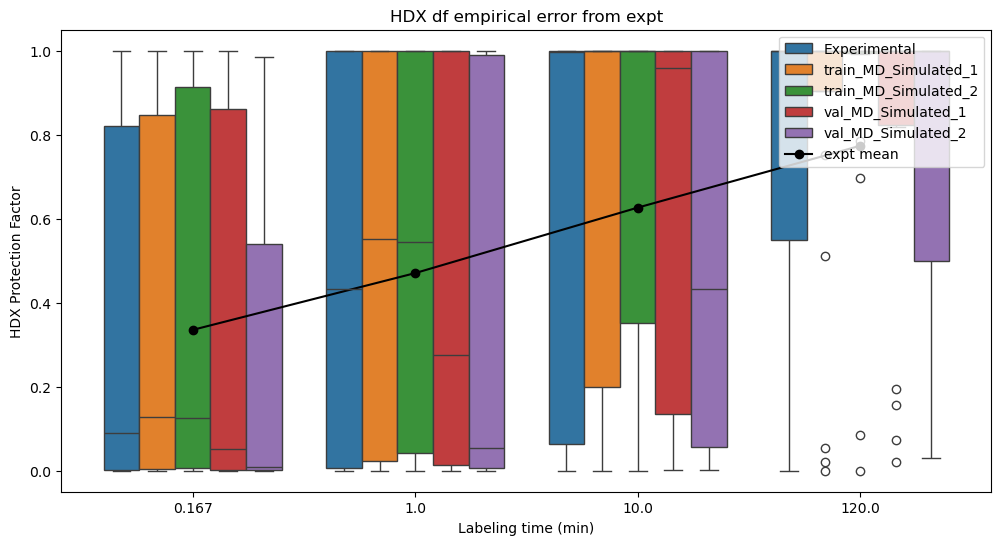

plotting paired errors
       0.167      1.0     10.0    120.0  peptide           calc_name
0    0.15669  0.63957  0.99996  1.00000        0        Experimental
1    0.09039  0.43293  0.99656  1.00000        1        Experimental
2    0.02665  0.14933  0.80157  1.00000        2        Experimental
3    0.18680  0.71010  1.00000  1.00000        3        Experimental
4    0.99880  1.00000  1.00000  1.00000        4        Experimental
..       ...      ...      ...      ...      ...                 ...
118  0.17627  0.68688  0.99999  1.00000       26  val_MD_Simulated_2
119  0.19355  0.72421  1.00000  1.00000       27  val_MD_Simulated_2
120  0.00799  0.04692  0.38156  0.99687       35  val_MD_Simulated_2
121  0.00365  0.02165  0.19662  0.92771       36  val_MD_Simulated_2
122  0.00943  0.05515  0.43293  0.99889       39  val_MD_Simulated_2

[123 rows x 6 columns]
expt values
[0.15669, 0.09039, 0.02665, 0.1868, 0.9988, 0.82092, 0.23198, 1.0, 0.00028, 0.91192, 5e-05, 0.0, 0.0, 0.0, 0.0003

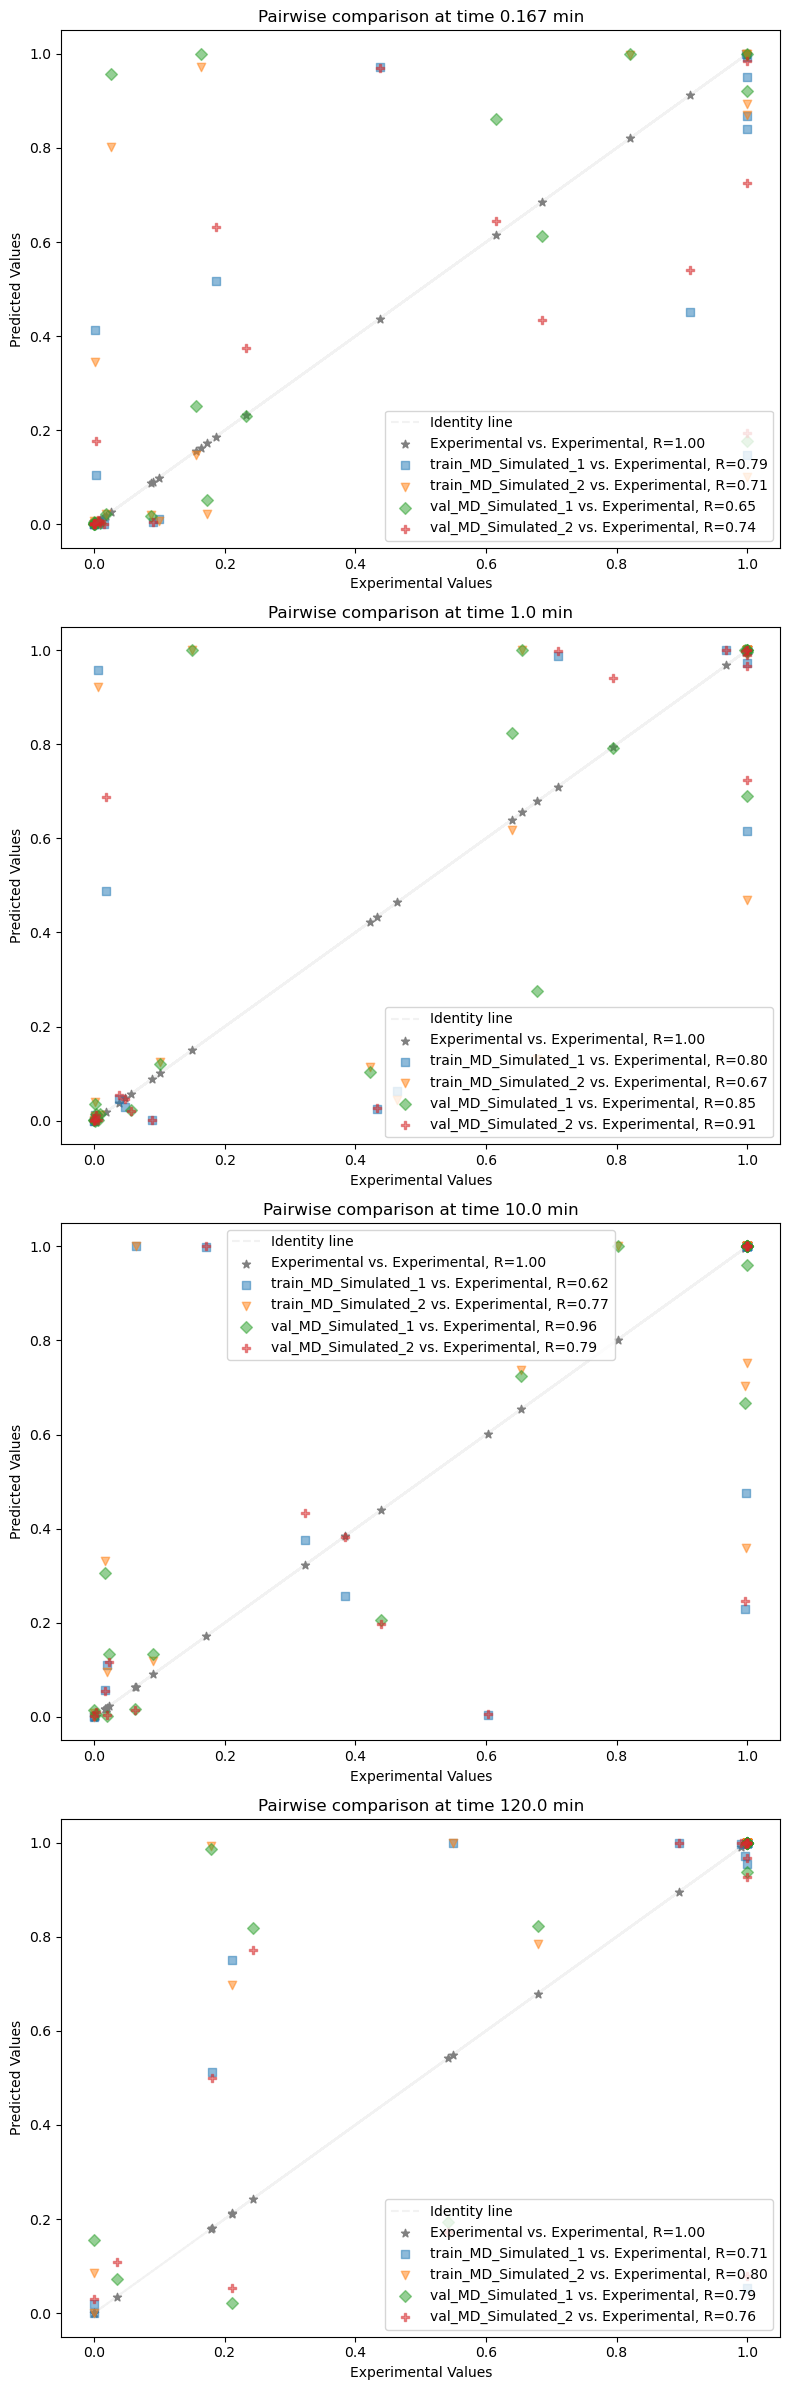

plotting paired trainval agreement
       0.167      1.0     10.0    120.0  peptide           calc_name
0    0.15669  0.63957  0.99996  1.00000        0        Experimental
1    0.09039  0.43293  0.99656  1.00000        1        Experimental
2    0.02665  0.14933  0.80157  1.00000        2        Experimental
3    0.18680  0.71010  1.00000  1.00000        3        Experimental
4    0.99880  1.00000  1.00000  1.00000        4        Experimental
..       ...      ...      ...      ...      ...                 ...
118  0.17627  0.68688  0.99999  1.00000       26  val_MD_Simulated_2
119  0.19355  0.72421  1.00000  1.00000       27  val_MD_Simulated_2
120  0.00799  0.04692  0.38156  0.99687       35  val_MD_Simulated_2
121  0.00365  0.02165  0.19662  0.92771       36  val_MD_Simulated_2
122  0.00943  0.05515  0.43293  0.99889       39  val_MD_Simulated_2

[123 rows x 6 columns]
expt values
[0.15669, 0.09039, 0.02665, 0.1868, 0.9988, 0.82092, 0.23198, 1.0, 0.00028, 0.91192, 5e-05, 0.0, 0.0,

/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/ValDX/HDX_plots.py:1340: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([[t, R, arg]], columns=["Time", "R", "calc_name"])])
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/ValDX/HDX_plots.py:1359: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  plot_df = pd.concat([plot_df, pd.DataFrame({"Time": t, "Type": "Train", "R": train

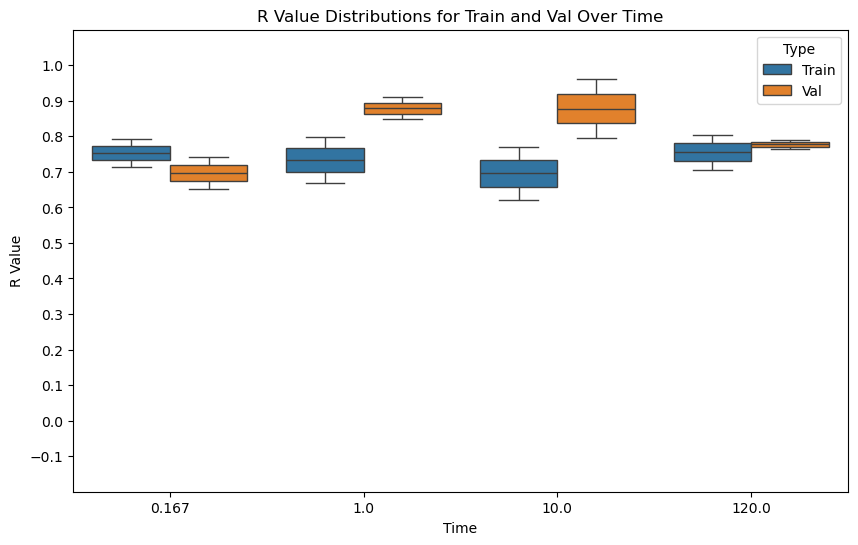

nan_df
       0.167      1.0     10.0    120.0  peptide             calc_name
0    0.00432  0.02559  0.22834  0.95543        1  train_MD_Simulated_1
1    0.51718  0.98722  1.00000  1.00000        3  train_MD_Simulated_1
2    0.95159  1.00000  1.00000  1.00000        4  train_MD_Simulated_1
3    0.99306  1.00000  1.00000  1.00000        7  train_MD_Simulated_1
4    0.45141  0.97255  1.00000  1.00000        9  train_MD_Simulated_1
..       ...      ...      ...      ...      ...                   ...
159  0.17627  0.68688  0.99999  1.00000       26    val_MD_Simulated_2
160  0.19355  0.72421  1.00000  1.00000       27    val_MD_Simulated_2
161  0.00799  0.04692  0.38156  0.99687       35    val_MD_Simulated_2
162  0.00365  0.02165  0.19662  0.92771       36    val_MD_Simulated_2
163  0.00943  0.05515  0.43293  0.99889       39    val_MD_Simulated_2

[164 rows x 6 columns]
nan_df + expt_df
       0.167      1.0     10.0    120.0  peptide             calc_name
0    0.00432  0.02559  0.2283

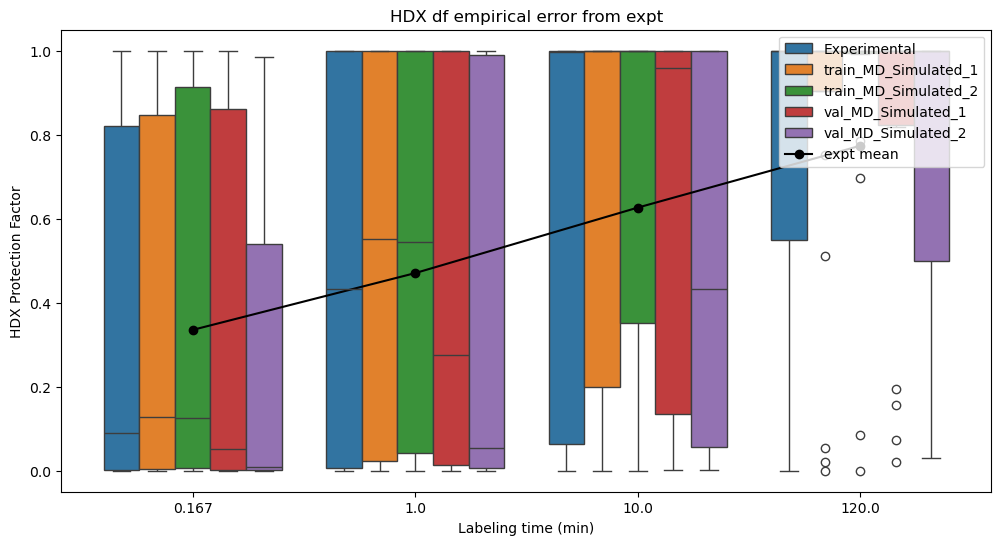

plot_dfracs_compare_abs
       0.167      1.0     10.0    120.0  peptide             calc_name
0    0.00432  0.02559  0.22834  0.95543        1  train_MD_Simulated_1
1    0.51718  0.98722  1.00000  1.00000        3  train_MD_Simulated_1
2    0.95159  1.00000  1.00000  1.00000        4  train_MD_Simulated_1
3    0.99306  1.00000  1.00000  1.00000        7  train_MD_Simulated_1
4    0.45141  0.97255  1.00000  1.00000        9  train_MD_Simulated_1
..       ...      ...      ...      ...      ...                   ...
200  0.00963  0.05627  0.43963  0.99904       36          Experimental
201  0.01757  0.10068  0.65396  1.00000       37          Experimental
202  0.09888  0.46390  0.99804  1.00000       38          Experimental
203  0.00650  0.03831  0.32339  0.99079       39          Experimental
204  0.17259  0.67841  0.99999  1.00000       40          Experimental

[205 rows x 6 columns]
       0.167      1.0     10.0    120.0  peptide     calc_name
164  0.15669  0.63957  0.99996  1.000

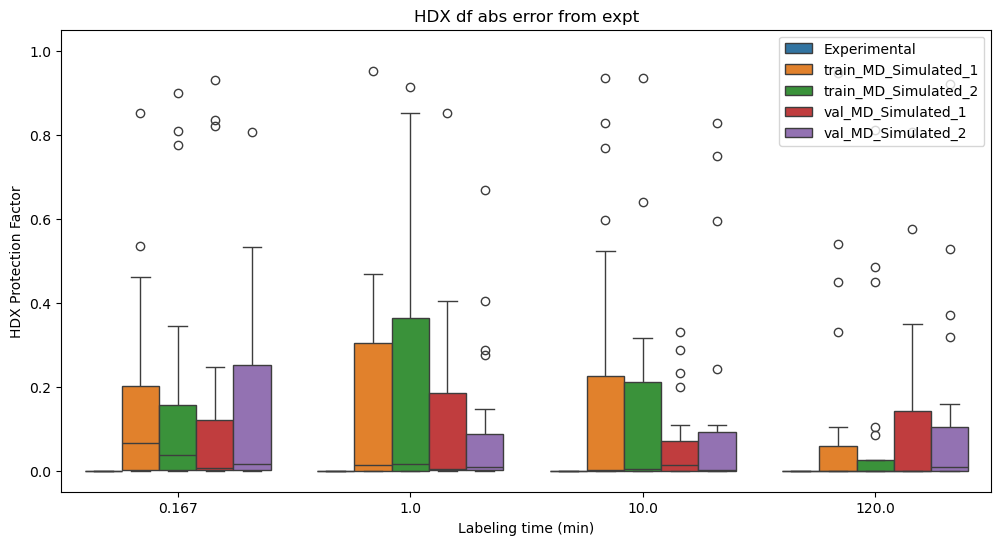

plot_dfracs_compare_MSE
       0.167      1.0     10.0    120.0  peptide             calc_name
0    0.00432  0.02559  0.22834  0.95543        1  train_MD_Simulated_1
1    0.51718  0.98722  1.00000  1.00000        3  train_MD_Simulated_1
2    0.95159  1.00000  1.00000  1.00000        4  train_MD_Simulated_1
3    0.99306  1.00000  1.00000  1.00000        7  train_MD_Simulated_1
4    0.45141  0.97255  1.00000  1.00000        9  train_MD_Simulated_1
..       ...      ...      ...      ...      ...                   ...
200  0.00963  0.05627  0.43963  0.99904       36          Experimental
201  0.01757  0.10068  0.65396  1.00000       37          Experimental
202  0.09888  0.46390  0.99804  1.00000       38          Experimental
203  0.00650  0.03831  0.32339  0.99079       39          Experimental
204  0.17259  0.67841  0.99999  1.00000       40          Experimental

[205 rows x 6 columns]
       0.167      1.0     10.0    120.0  peptide     calc_name
164  0.15669  0.63957  0.99996  1.000

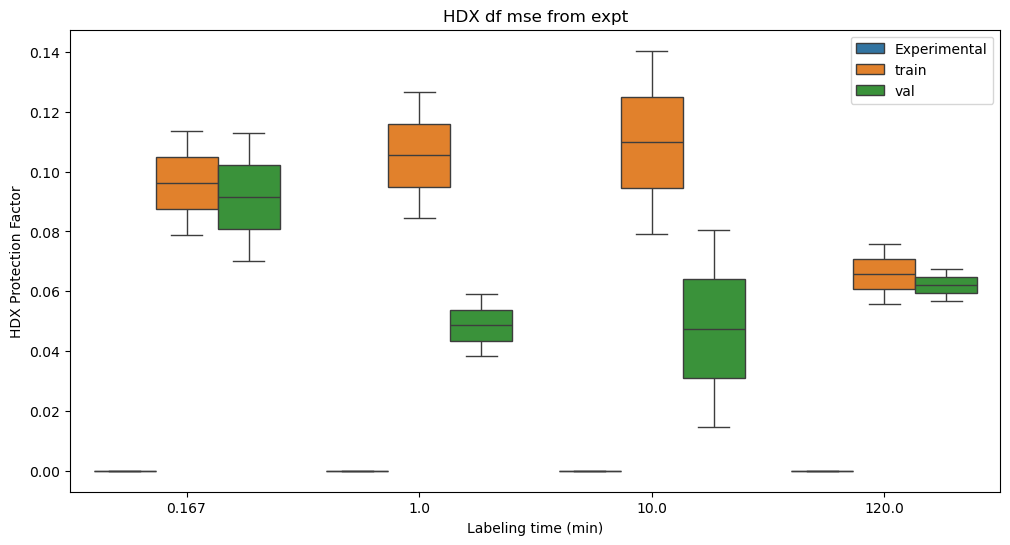

plotting paired errors
       0.167      1.0     10.0    120.0  peptide             calc_name
0    0.00432  0.02559  0.22834  0.95543        1  train_MD_Simulated_1
1    0.51718  0.98722  1.00000  1.00000        3  train_MD_Simulated_1
2    0.95159  1.00000  1.00000  1.00000        4  train_MD_Simulated_1
3    0.99306  1.00000  1.00000  1.00000        7  train_MD_Simulated_1
4    0.45141  0.97255  1.00000  1.00000        9  train_MD_Simulated_1
..       ...      ...      ...      ...      ...                   ...
200  0.00963  0.05627  0.43963  0.99904       36          Experimental
201  0.01757  0.10068  0.65396  1.00000       37          Experimental
202  0.09888  0.46390  0.99804  1.00000       38          Experimental
203  0.00650  0.03831  0.32339  0.99079       39          Experimental
204  0.17259  0.67841  0.99999  1.00000       40          Experimental

[205 rows x 6 columns]
expt values
[0.15669, 0.09039, 0.02665, 0.1868, 0.9988, 0.82092, 0.23198, 1.0, 0.00028, 0.91192, 5e-0

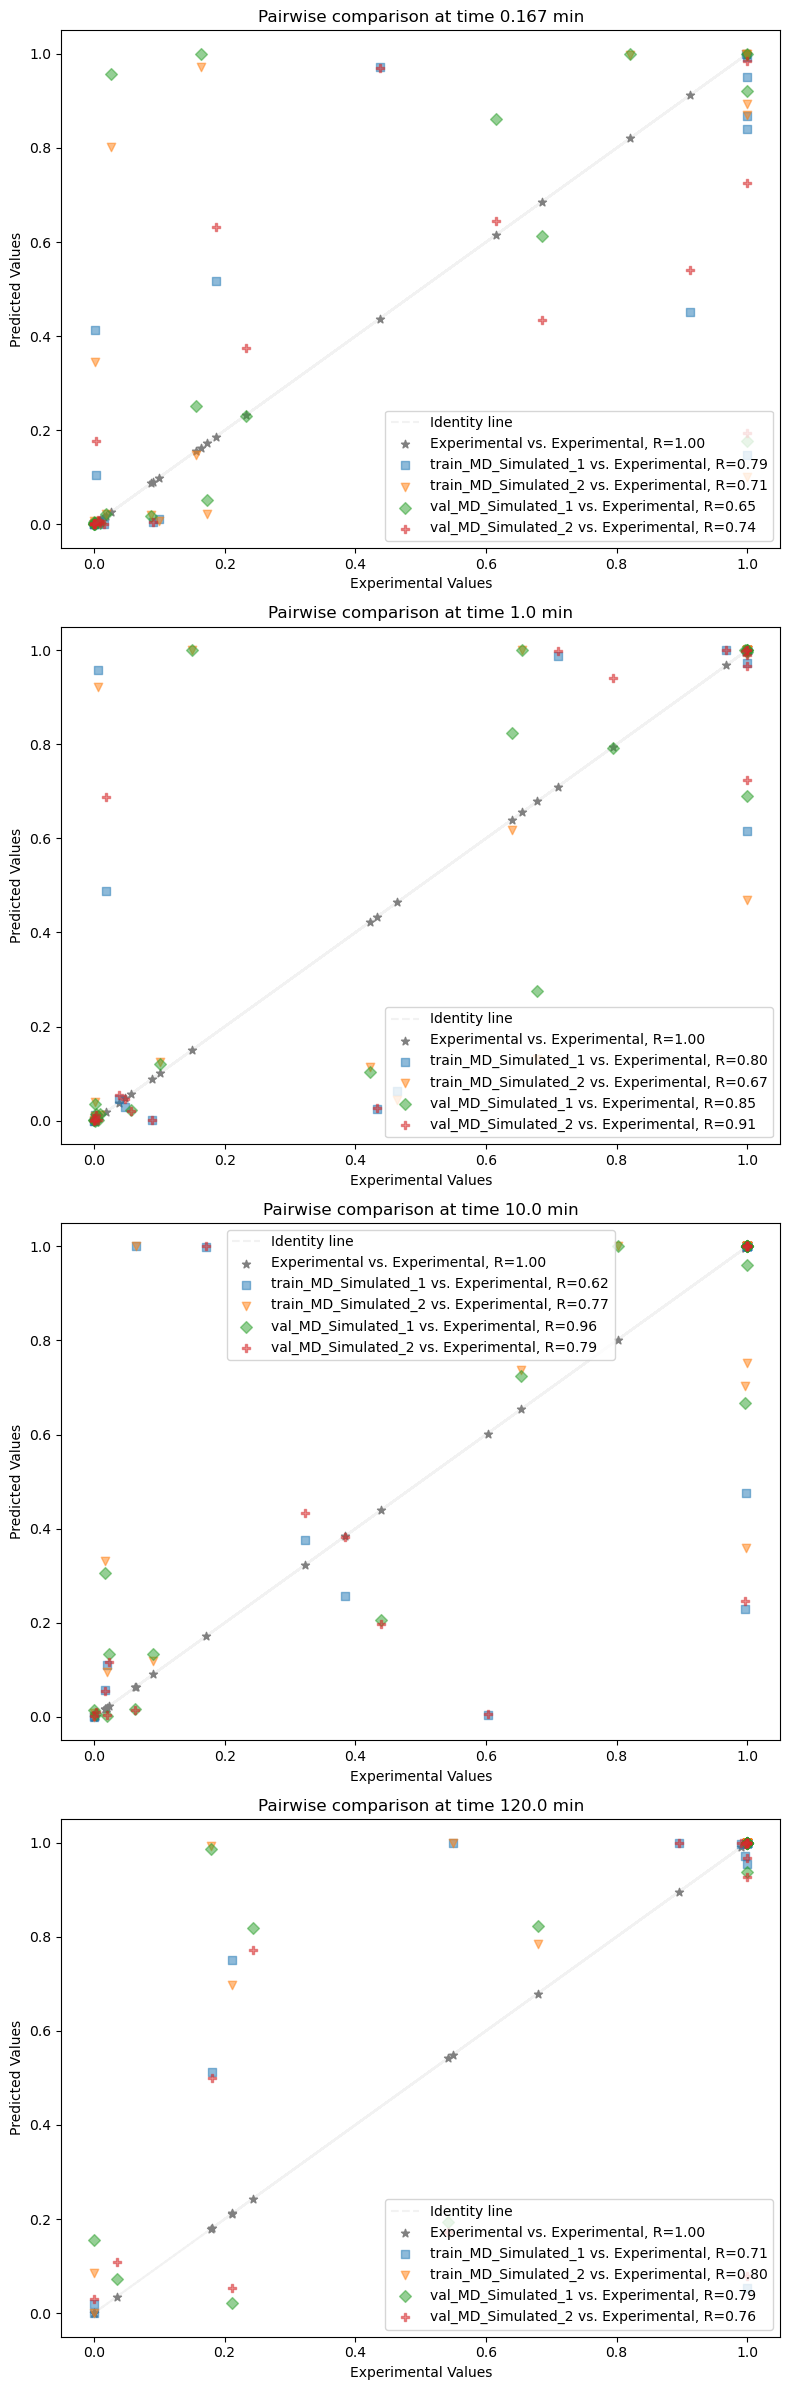

Train coverage: 78.05
Val coverage: 80.49
plot_dfracs_compare
       0.167      1.0     10.0  120.0  peptide             calc_name
0    0.15669  0.63957  0.99996    1.0        0          Experimental
1    0.09039  0.43293  0.99656    1.0        1          Experimental
2    0.02665  0.14933  0.80157    1.0        2          Experimental
3    0.18680  0.71010  1.00000    1.0        3          Experimental
4    0.99880  1.00000  1.00000    1.0        4          Experimental
..       ...      ...      ...    ...      ...                   ...
118  0.97089  1.00000  1.00000    1.0       16  val_MD_Simulated_avg
119  0.98494  1.00000  1.00000    1.0        4  val_MD_Simulated_avg
120  0.99881  1.00000  1.00000    1.0       28  val_MD_Simulated_avg
121  0.99999  1.00000  1.00000    1.0        5  val_MD_Simulated_avg
122  1.00000  1.00000  1.00000    1.0       29  val_MD_Simulated_avg

[123 rows x 6 columns]
      0.167      1.0     10.0    120.0  peptide     calc_name
0   0.15669  0.63957  0.

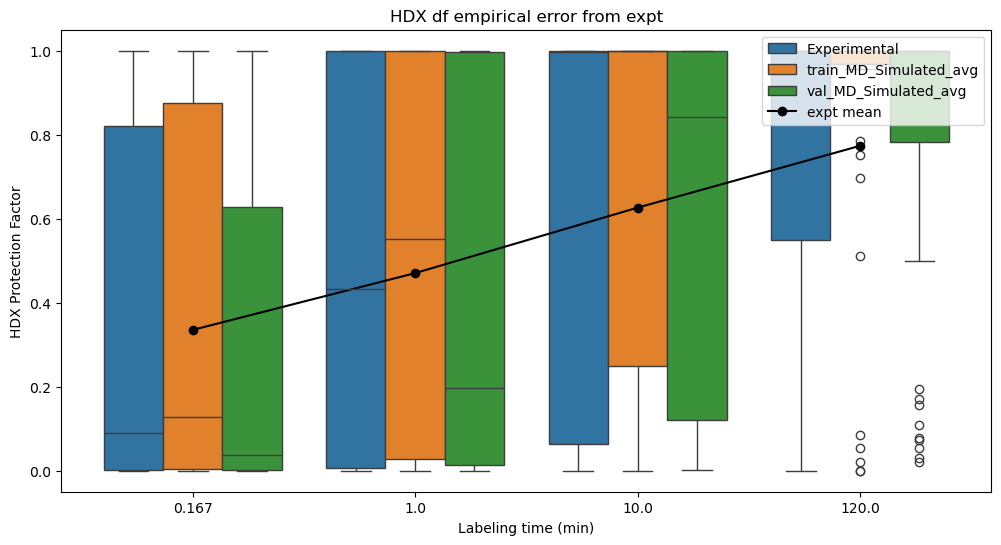

plotting paired errors
       0.167      1.0     10.0  120.0  peptide             calc_name
0    0.15669  0.63957  0.99996    1.0        0          Experimental
1    0.09039  0.43293  0.99656    1.0        1          Experimental
2    0.02665  0.14933  0.80157    1.0        2          Experimental
3    0.18680  0.71010  1.00000    1.0        3          Experimental
4    0.99880  1.00000  1.00000    1.0        4          Experimental
..       ...      ...      ...    ...      ...                   ...
118  0.97089  1.00000  1.00000    1.0       16  val_MD_Simulated_avg
119  0.98494  1.00000  1.00000    1.0        4  val_MD_Simulated_avg
120  0.99881  1.00000  1.00000    1.0       28  val_MD_Simulated_avg
121  0.99999  1.00000  1.00000    1.0        5  val_MD_Simulated_avg
122  1.00000  1.00000  1.00000    1.0       29  val_MD_Simulated_avg

[123 rows x 6 columns]
expt values
[0.15669, 0.09039, 0.02665, 0.1868, 0.9988, 0.82092, 0.23198, 1.0, 0.00028, 0.91192, 5e-05, 0.0, 0.0, 0.0, 0.0003

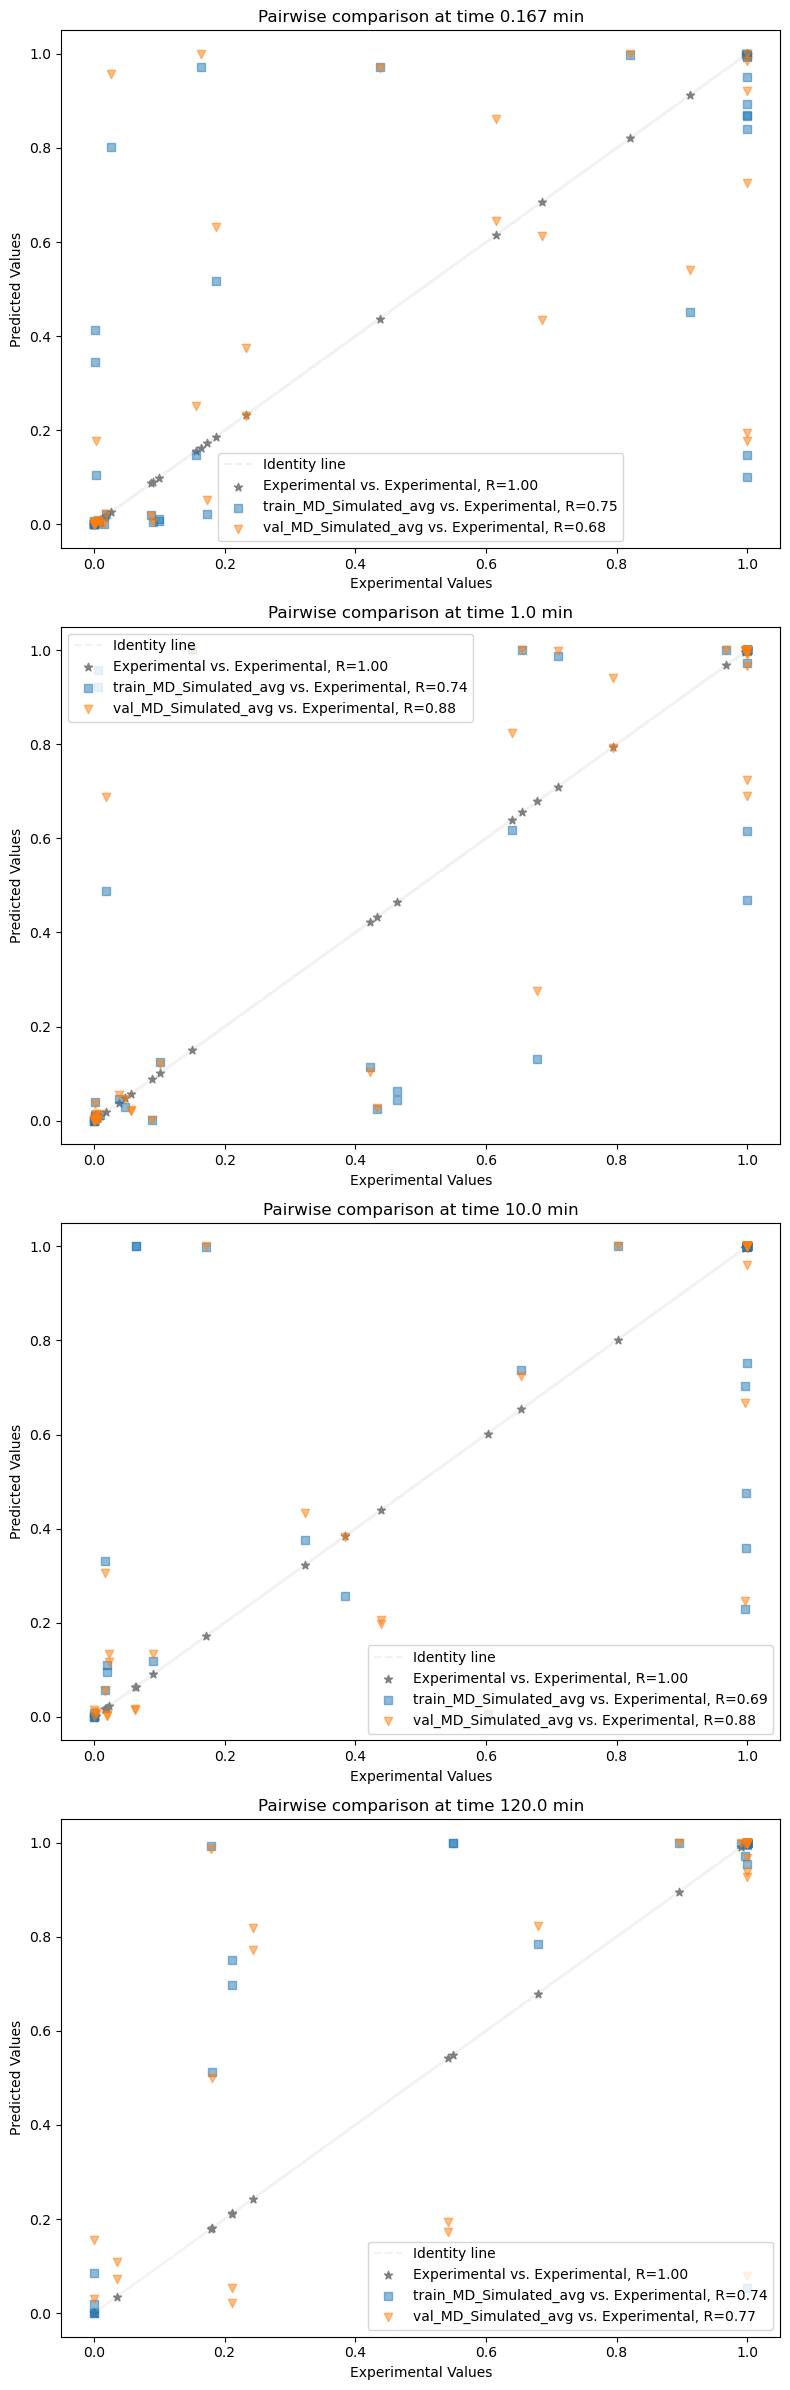

In [ ]:
# with open('dump_test_full0.560.pickle', 'rb') as f:
#     dump = pickle.load(f)

# train_dfs, val_dfs, train_gammas, val_gammas = dump

# VDX.evaluate_HDX(train_dfs=train_dfs, 
#                  val_dfs=val_dfs, 
#                  calc_name=test_name,
#                  expt_name=expt_name,
#                  train_gammas=train_gammas, 
#                  val_gammas=val_gammas, 
#                  n_reps=VDX.settings.replicates,
#                    )

In [ ]:
# file_name = "covid_submissions_all_info.csv"

In [ ]:
# sub_test = pd.read_csv(file_name)

In [ ]:
# sub_test.columns.to_list()